<a href="https://colab.research.google.com/github/Veyis1/Hello/blob/main/CAPSTONE_PROJECT_HANDLING_OUTLIER_AND_DUMMIES2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
import re

import requests


import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 2000
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', df.shape[0]+1)
pd.options.display.max_columns = 150

In [ ]:
df0 = pd.read_csv("cleaned_and_Handling_data2.csv")
df = df0.copy()

In [ ]:
df.head(15).T

0   \
make_model                                          Mercedes-Benz A 160   
make                                                      Mercedes-Benz   
location              P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...   
price                                                         16950.000   
body_type                                                       Compact   
type                                                               Used   
doors                                                             5.000   
warranty                                                         24.000   
mileage                                                      120200.000   
gearbox                                                          Manual   
fuel_type                                                        Diesel   
paint                                                          Metallic   
seller                                                           Dealer   
seats                                                             5.000   
engine_size                                                           0   
cylinders                                                         4.000   
comfort_convenience   Air conditioning, Automatic climate control, P...   
entertainment_media                                               0.000   
safety_security       ABS, Central door lock, Driver-side airbag, El...   
full_service_history                                                 No   
age                                                               6.000   
power_kW                                                         66.000   
power_hp                                                        292.000   
cons_avg                                                          3.800   
cons_country                                                      3.800   
cons_city                                                         4.500   

                                                                     1   \
make_model                                        Mercedes-Benz EQE 350   
make                                                      Mercedes-Benz   
location                   APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES   
price                                                         80900.000   
body_type                                                       Compact   
type                                                     Pre-registered   
doors                                                             4.000   
warranty                                                         24.000   
mileage                                                        5000.000   
gearbox                                                       Automatic   
fuel_type                                                      Electric   
paint                                                         Uni/basic   
seller                                                           Dealer   
seats                                                             5.000   
engine_size                                                           1   
cylinders                                                         4.000   
comfort_convenience   Air conditioning, Automatic climate control, P...   
entertainment_media                                               0.000   
safety_security       ABS, Central door lock, Driver-side airbag, El...   
full_service_history                                                 No   
age                                                               0.000   
power_kW                                                        215.000   
power_hp                                                        292.000   
cons_avg                                                          3.800   
cons_country                                                      3.800   
cons_city                                                         4.500   

                 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            28630 non-null  object 
 1   make                  28630 non-null  object 
 2   location              28630 non-null  object 
 3   price                 28630 non-null  float64
 4   body_type             28630 non-null  object 
 5   type                  28630 non-null  object 
 6   doors                 28630 non-null  float64
 7   warranty              28630 non-null  float64
 8   mileage               28630 non-null  float64
 9   gearbox               28630 non-null  object 
 10  fuel_type             28630 non-null  object 
 11  paint                 28630 non-null  object 
 12  seller                28630 non-null  object 
 13  seats                 28630 non-null  float64
 14  engine_size           28630 non-null  int64  
 15  cylinders          

In [ ]:
df.isnull().mean()*100

make_model             0.000
make                   0.000
location               0.000
price                  0.000
body_type              0.000
type                   0.000
doors                  0.000
warranty               0.000
mileage                0.000
gearbox                0.000
fuel_type              0.000
paint                  0.000
seller                 0.000
seats                  0.000
engine_size            0.000
cylinders              0.000
comfort_convenience    0.000
entertainment_media    0.000
safety_security        0.000
full_service_history   0.000
age                    0.000
power_kW               0.000
power_hp               0.000
cons_avg               0.000
cons_country           0.000
cons_city              0.000
dtype: float64

In [ ]:
df.duplicated(keep=False).sum()

3733

In [ ]:
numeric_col = df.select_dtypes(include="number")
print(numeric_col.columns)


Index(['price', 'doors', 'warranty', 'mileage', 'seats', 'engine_size',
       'cylinders', 'entertainment_media', 'age', 'power_kW', 'power_hp',
       'cons_avg', 'cons_country', 'cons_city'],
      dtype='object')


In [ ]:
def ilk_bakis(column):
    sütün_ad = column.name
    nana_sayisi = column.isnull().sum()
    nana_yüzde = column.isnull().mean() * 100
    sütun_value_counts = column.value_counts()
    print(f' Sütün Adi :{sütün_ad}')
    print(f' Nan deger sayisi : {nana_sayisi}')
    print(f' Nan yüzdelik sayisi : % {round(nana_yüzde), 2}')
    print(f' Value_count_degeri : {sütun_value_counts}')

In [ ]:
ilk_bakis(df.price)

 Sütün Adi :price
 Nan deger sayisi : 0
 Nan yüzdelik sayisi : % (0, 2)
 Value_count_degeri : 14990.000    222
12990.000    219
16990.000    186
19990.000    166
9990.000     160
            ... 
19112.000      1
30465.000      1
18461.000      1
22649.000      1
4440.000       1
Name: price, Length: 5021, dtype: int64


In [ ]:
df.price.describe()

count    28630.000
mean     23470.662
std      23953.504
min        490.000
25%      11990.000
50%      17979.000
75%      27990.000
max     999999.000
Name: price, dtype: float64

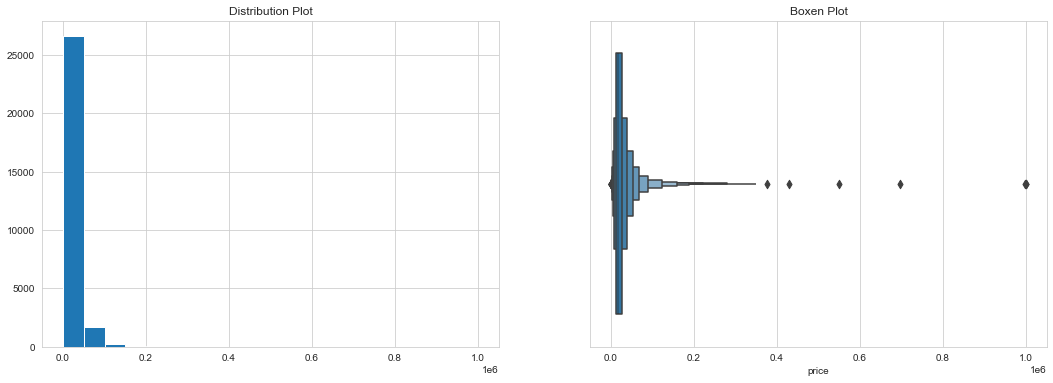

In [ ]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.hist(df.price, bins=20)
#sns.distplot(df.price, bins=20)
plt.title('Distribution Plot')

plt.subplot(1, 2, 2)
sns.boxenplot(df.price)
plt.title('Boxen Plot')

plt.show()

In [ ]:
df.price.sort_values().head(10)

5847    490.000
19565   500.000
5513    500.000
17516   590.000
5291    600.000
5351    600.000
5296    699.000
23792   700.000
3375    700.000
5519    740.000
Name: price, dtype: float64

In [ ]:
df.loc[df.price.sort_values().tail(50).index]

make_model           make  \
408        Mercedes-Benz AMG GT  Mercedes-Benz   
21821              Ford Mustang           Ford   
19632               Nissan GT-R         Nissan   
686      Mercedes-Benz S 63 AMG  Mercedes-Benz   
711           Mercedes-Benz 190  Mercedes-Benz   
19615               Nissan GT-R         Nissan   
19505               Nissan GT-R         Nissan   
572     Mercedes-Benz SL 63 AMG  Mercedes-Benz   
21923              Ford Mustang           Ford   
610         Mercedes-Benz G 500  Mercedes-Benz   
613         Mercedes-Benz G 500  Mercedes-Benz   
19599               Nissan GT-R         Nissan   
622     Mercedes-Benz SL 63 AMG  Mercedes-Benz   
838        Mercedes-Benz AMG GT  Mercedes-Benz   
1490     Mercedes-Benz G 63 AMG  Mercedes-Benz   
861              Mercedes-Benz   Mercedes-Benz   
10369                  Fiat 131           Fiat   
965        Mercedes-Benz AMG GT  Mercedes-Benz   
789     Mercedes-Benz SL 63 AMG  Mercedes-Benz   
830        Mercedes-Benz AMG GT  Mercedes-Benz   
822        Mercedes-Benz AMG GT  Mercedes-Benz   
450        Mercedes-Benz AMG GT  Mercedes-Benz   
914        Mercedes-Benz AMG GT  Mercedes-Benz   
1573     Mercedes-Benz G 63 AMG  Mercedes-Benz   
19588               Nissan GT-R         Nissan   
438        Mercedes-Benz AMG GT  Mercedes-Benz   
21312                     Ford            Ford   
1393     Mercedes-Benz G 63 AMG  Mercedes-Benz   
1502     Mercedes-Benz G 63 AMG  Mercedes-Benz   
21961               Ford Ranger           Ford   
1587     Mercedes-Benz G 63 AMG  Mercedes-Benz   
1397     Mercedes-Benz G 63 AMG  Mercedes-Benz   
19314            Nissan Skyline         Nissan   
1413     Mercedes-Benz G 63 AMG  Mercedes-Benz   
1320     Mercedes-Benz G 63 AMG  Mercedes-Benz   
1114          Mercedes-Benz SLS  Mercedes-Benz   
1444     Mercedes-Benz G 63 AMG  Mercedes-Benz   
710        Mercedes-Benz AMG GT  Mercedes-Benz   
1595     Mercedes-Benz G 63 AMG  Mercedes-Benz   
1076   Mercedes-Benz GLE 63 AMG  Mercedes-Benz   
1451   Mercedes-Benz GLE 63 AMG  Mercedes-Benz   
1305     Mercedes-Benz G 63 AMG  Mercedes-Benz   
21927                     Ford            Ford   
1317     Mercedes-Benz G 63 AMG  Mercedes-Benz   
21606                   Ford GT           Ford   
21553                   Ford GT           Ford   
1212     Mercedes-Benz G 63 AMG  Mercedes-Benz   
21919                   Ford GT           Ford   
28184                 Volvo 240          Volvo   
27804                 Volvo 240          Volvo   

                                                location      price  \
408            Wormser Landstraße 194,  67346 Speyer, DE 197500.000   
21821  C/ DUBLIN, 39 C POL. COM EUROPOLIS,  28232 LAS... 198900.000   
19632           Via Tiburtina, 916,  00156 Roma - RM, IT 199000.000   
686                  79 Avenue Marceau,  75116 PARIS, FR 199500.000   
711                 Immendorfer Str. 1,  50354 Hürth, DE 199999.000   
19615  Prestige auto di Feroleto Giulio  Via Trecella... 200000.000   
19505              Münsterstr. 27,  48341 Altenberge, DE 205000.000   
572       Adolf-Richter-Str. 13-15,  75179 Pforzheim, DE 207113.000   
21923           Mühlweg 52 / 54 / 60,  8402 Werndorf, AT 208101.000   
610            Alte Bundesstr. 45,  71332 Waiblingen, DE 209000.000   
613            Alte Bundesstr. 45,  71332 Waiblingen, DE 209000.000   
19599                                 65779 Kelkheim, DE 209000.000   
622             Heinrich-Hertz-Str. 2,  92224 Amberg, DE 209850.000   
838            Mercatorstraße  20,  21502 Geesthacht, DE 209900.000   
1490      Frankfurter Straße 49,  38122 Braunschweig, DE 213900.000   
861            Altendorfer Straße 44 C,  45127 Essen, DE 214885.000   
10369   Oeffinger Straße 7,  71686 Remseck am Neckar, DE 214900.000   
965          Sandershäuser Straße 110,  34123 Kassel, DE 215550.000   
789                                  60325 Frankfurt, DE 217900.000   
830            Mercatorstraße  20,  21502 Geesthac

In [ ]:
df.loc[df["make_model"] == "Mercedes-Benz G 63 AMG"][["make_model", "price", "age", "body_type", "mileage", "engine_size"]]

make_model      price   age         body_type   mileage  \
1212  Mercedes-Benz G 63 AMG 696900.000 0.000  Off-Road/Pick-up   100.000   
1248  Mercedes-Benz G 63 AMG  99980.000 7.000  Off-Road/Pick-up 23521.000   
1305  Mercedes-Benz G 63 AMG 344900.000 0.000  Off-Road/Pick-up   100.000   
1317  Mercedes-Benz G 63 AMG 375900.000 1.000  Off-Road/Pick-up   100.000   
1320  Mercedes-Benz G 63 AMG 268900.000 0.000  Off-Road/Pick-up  1800.000   
1359  Mercedes-Benz G 63 AMG  92380.000 9.000  Off-Road/Pick-up 49700.000   
1379  Mercedes-Benz G 63 AMG 119800.000 5.000  Off-Road/Pick-up 31000.000   
1393  Mercedes-Benz G 63 AMG 248800.000 0.000  Off-Road/Pick-up  8800.000   
1395  Mercedes-Benz G 63 AMG  92690.000 7.000  Off-Road/Pick-up 82178.000   
1397  Mercedes-Benz G 63 AMG 259880.000 0.000  Off-Road/Pick-up  9900.000   
1413  Mercedes-Benz G 63 AMG 267810.000 0.000  Off-Road/Pick-up  3003.000   
1444  Mercedes-Benz G 63 AMG 279063.000 0.000  Off-Road/Pick-up  9900.000   
1490  Mercedes-Benz G 63 AMG 213900.000 3.000  Off-Road/Pick-up 33542.000   
1502  Mercedes-Benz G 63 AMG 249890.000 2.000  Off-Road/Pick-up  2901.000   
1573  Mercedes-Benz G 63 AMG 232000.000 1.000  Off-Road/Pick-up 16000.000   
1587  Mercedes-Benz G 63 AMG 259000.000 0.000  Off-Road/Pick-up  4003.000   
1595  Mercedes-Benz G 63 AMG 284780.000 0.000  Off-Road/Pick-up  9900.000   

      engine_size  
1212         3982  
1248         5461  
1305         3982  
1317         3982  
1320         3982  
1359         5461  
1379         5461  
1393         3982  
1395         5461  
1397         3982  
1413         3982  
1444         3982  
1490         3982  
1502         3982  
1573         3982  
1587         3982  
1595         3982

In [ ]:
#def get_model_index(df, make_model, min_price):
#    return df[(df["make_model"] == make_model) & (df['price'] >= min_price)].index

#mercedes_index = get_model_index(df, "Mercedes-Benz G 63 AMG", 400000)
#volvo_index = get_model_index(df, "Volvo 240", 100000)
#ford_index = get_model_index(df, "Ford GT", 600000)
#nissan_index = get_model_index(df, "Nissan Skyline", 140000)

Int64Index([1305, 1317, 1320, 1397, 1413, 1444, 1587, 1595], dtype='int64')

In [ ]:
Mercedesindex = df[(df["make_model"] == "Mercedes-Benz G 63 AMG") & (df['price'] >= 400000)].index
Volvoindex = df[(df["make_model"] == "Volvo 240") & (df['price'] >= 100000)].index
Fordindex = df[(df["make_model"] == "Ford GT") & (df['price'] >= 600000)].index
Nissanindex = df[(df["make_model"] == "Nissan Skyline") & (df['price'] >= 140000)].index

In [ ]:
print(df.shape)
df.drop(Mercedesindex, inplace=True)
df.drop(Volvoindex, inplace=True)
df.drop(Fordindex, inplace=True)
df.drop(Nissanindex, inplace=True)
print(df.shape)

(28630, 26)
(28621, 26)


In [ ]:
df['price'].sort_values().tail(20)

438     239000.000
21312   240000.000
1393    248800.000
1502    249890.000
21961   250000.000
1587    259000.000
1397    259880.000
1413    267810.000
1320    268900.000
1114    279000.000
1444    279063.000
710     283900.000
1595    284780.000
1076    299000.000
1451    299000.000
1305    344900.000
21927   349000.000
1317    375900.000
21606   430000.000
21553   549000.000
Name: price, dtype: float64

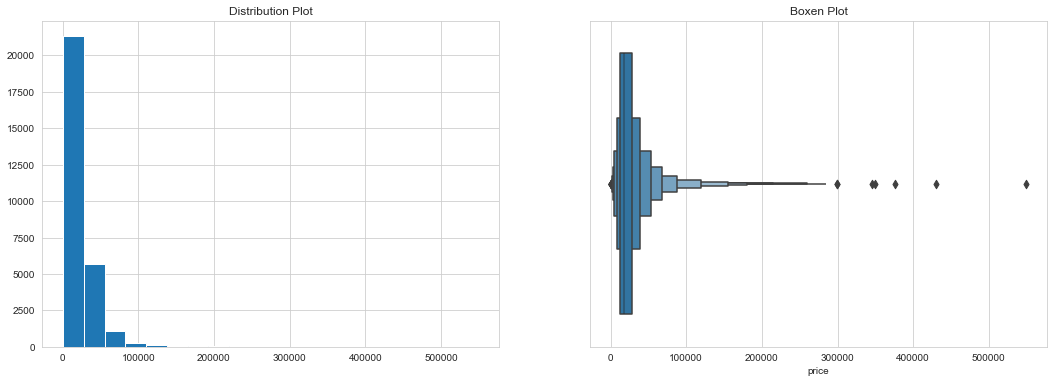

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(df.price, bins=20)
#sns.distplot(df.price, bins=20)
plt.title('Distribution Plot')

plt.subplot(1, 2, 2)
sns.boxenplot(df.price)
plt.title('Boxen Plot')

plt.show()

In [ ]:
ilk_bakis(df.doors)

 Sütün Adi :doors
 Nan deger sayisi : 0
 Nan yüzdelik sayisi : % (0, 2)
 Value_count_degeri : 5.000    17602
2.000     5661
4.000     3032
3.000     2319
6.000        5
1.000        2
Name: doors, dtype: int64


In [ ]:
df.loc[df["doors"]==1,"make_model"]#  ilk_bakis vesilesiyle 5 adet 6 kapili  ve 2 adet 1 kapili aca kesfettik

10001    Fiat 124 Spider
21140        Ford Fiesta
Name: make_model, dtype: object

In [ ]:
df.groupby('make_model')["make_model", "body_type", "doors"].value_counts(dropna=False)[['Fiat 124 Spider']]
#df.groupby('make_model')["make_model", "body_type", "doors"].value_counts(dropna=False).loc['Fiat 124 Spider']

make_model       body_type    doors
Fiat 124 Spider  Convertible  2.000    56
                 Coupe        2.000    38
                 Convertible  1.000     1
                              3.000     1
dtype: int64

In [ ]:
df.loc[df["make_model"] == "Fiat 124 Spider", ["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model       body_type    doors
Fiat 124 Spider  Convertible  2.000    56
                 Coupe        2.000    38
                 Convertible  1.000     1
                              3.000     1
dtype: int64

In [ ]:
df.groupby('make_model')["make_model", "body_type", "doors"].value_counts(dropna=False)[['Ford Fiesta']]

make_model   body_type  doors
Ford Fiesta  Compact    5.000    137
             Sedan      5.000    120
             Compact    3.000     77
             Sedan      3.000     31
             Compact    4.000     18
             Sedan      4.000      6
             Compact    2.000      5
             Sedan      2.000      2
             Coupe      3.000      2
                        5.000      1
             Compact    1.000      1
dtype: int64

In [ ]:
#df.loc[df['make_model']=="Ford Fiesta",["make_model", "body_type", "doors"]].value_counts(dropna=False)

In [ ]:
df[df["doors"]==6]["make_model"]

15931     Dacia Logan
16097     Dacia Logan
16105    Dacia Dokker
16129     Dacia Logan
16163     Dacia Logan
Name: make_model, dtype: object

In [ ]:
df.doors.replace([1, 6], np.nan, inplace=True)# 1 ve 6 değerleri kapı sayısı olarak anlamlı olmadığı durumlarda (örneğin, hatalı veri girişi gibi), bu kod bu değerleri NaN ile değiştirerek veri temizleme sürecini gerçekleştirebilir

In [ ]:
df["doors"].isnull().sum()

7

In [ ]:
def fill_with_mode(df, col_name):
    mode_value = df[col_name].mode()[0]# digert indekleri de doldurmak icin mode[0] demek lazim
    df[col_name].fillna(mode_value, inplace=True)

    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
fill_with_mode(df,'doors')

COLUMN NAME    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
5.000    17609
2.000     5661
4.000     3032
3.000     2319
Name: doors, dtype: int64


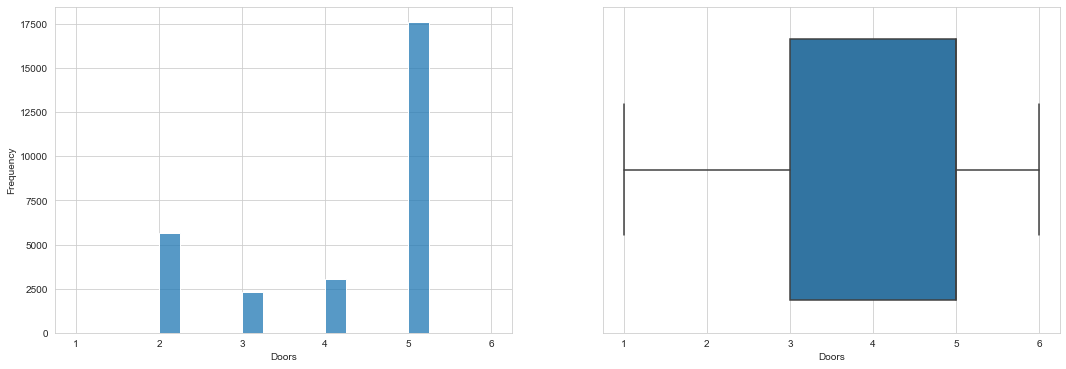

In [ ]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(df.doors, bins=20)

plt.xlabel('Doors')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(df.doors)
plt.xlabel('Doors')

plt.show()

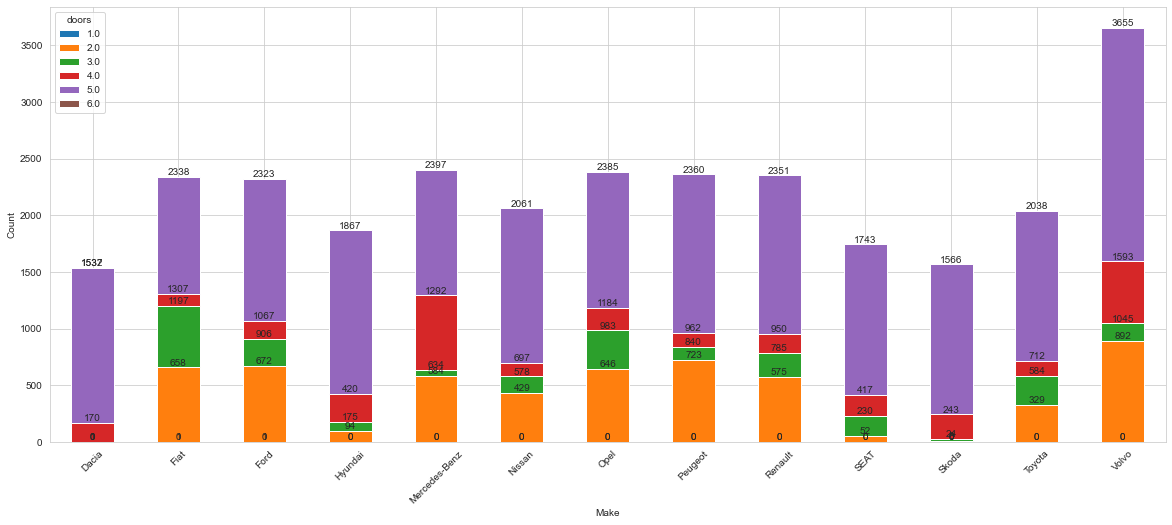

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

df.groupby(["make", "doors"]).size().unstack().plot(kind='bar', stacked=True, ax=ax)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [ ]:

df.drop("doors", axis=1, inplace=True)
print(df.shape)

(28621, 25)


In [ ]:
ilk_bakis(df.mileage)

 Sütün Adi :mileage
 Nan deger sayisi : 0
 Nan yüzdelik sayisi : % (0, 2)
 Value_count_degeri : 10.000        586
1.000         170
50.000        133
5000.000      118
100.000       118
             ... 
43577.000       1
141589.000      1
59821.000       1
123500.000      1
230047.000      1
Name: mileage, Length: 14182, dtype: int64


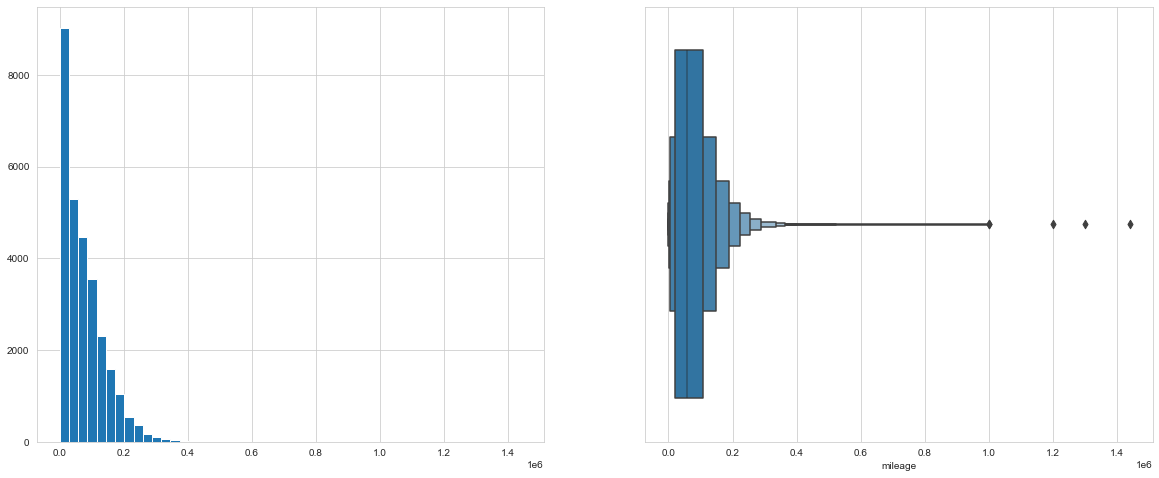

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.hist(df.mileage, bins=50)

plt.subplot(122)
sns.boxenplot(df.mileage)
plt.show()

In [ ]:
ilk_bakis(df['seats'])

 Sütün Adi :seats
 Nan deger sayisi : 0
 Nan yüzdelik sayisi : % (0, 2)
 Value_count_degeri : 5.000     20668
4.000      5968
2.000      1273
7.000       565
8.000        46
9.000        38
3.000        25
6.000        18
0.000        11
1.000         7
17.000        2
Name: seats, dtype: int64


In [ ]:
df.drop("seats", axis=1, inplace=True)

In [ ]:
ilk_bakis(df.engine_size)

 Sütün Adi :engine_size
 Nan deger sayisi : 0
 Nan yüzdelik sayisi : % (0, 2)
 Value_count_degeri : 1598     2099
999      2068
1969     1929
0        1515
1461     1110
1998     1000
998       925
1199      867
1498      782
1997      665
1968      625
1984      580
1332      510
1798      473
1560      472
898       405
1499      397
1197      382
1242      373
1995      352
1991      351
1368      348
1248      322
2435      302
1600      252
2143      242
1364      226
1500      210
5038      204
1950      202
3982      202
1591      201
1956      195
2000      191
3498      175
1395      174
1987      159
1149      157
1796      156
3696      154
1200      153
1490      152
1497      149
1198      149
2400      148
2996      145
1999      145
1398      143
1794      138
1496      137
1618      128
1482      127
1582      125
2925      117
875       112
1587      110
1595      109
1596      106
2987      105
1400      104
2261      101
1000       99
1333       94
1685       92
1580

In [ ]:
df["engine_size"].describe()

count   28621.000
mean     1669.132
std      1073.223
min         0.000
25%      1229.000
50%      1591.000
75%      1984.000
max     99900.000
Name: engine_size, dtype: float64

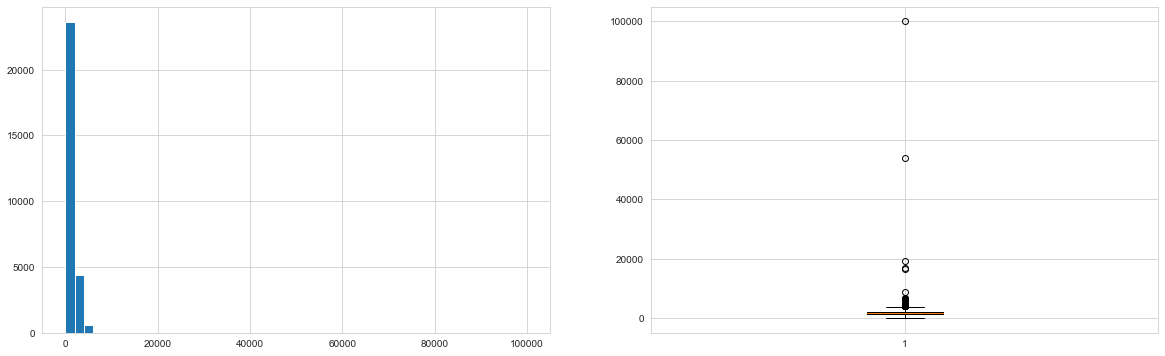

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=50)

plt.subplot(122)
plt.boxplot(df["engine_size"], whis=2.5)

plt.show()

In [ ]:
df["engine_size"].sort_values(ascending=False).head(20)

16556    99900
21330    54009
716      19194
5580     16998
16105    16597
21667     8660
21797     6653
21345     6400
21653     6400
21393     6387
693       6300
699       6300
21481     6294
21333     6276
703       6209
679       6208
2072      6208
813       6208
722       6208
2169      6208
Name: engine_size, dtype: int64

In [ ]:
df["engine_size"].sort_values(ascending=True).head(20)

0        0
15893    0
15903    0
2462     0
15921    0
2451     0
15938    0
15941    0
15976    0
15982    0
15988    0
15991    0
2420     0
16023    0
16065    0
16073    0
2372     0
2371     0
2301     0
16211    0
Name: engine_size, dtype: int64

In [ ]:
df["engine_size"].value_counts().sort_index(ascending=True)

0        1515
1          30
2          12
4           2
5           3
20          1
200         1
289         1
300         1
332         1
498         1
499         4
500         2
549         1
600         1
650         2
652         2
698         1
750         2
767         3
839         1
843         6
847         1
850         4
875       112
898       405
899        20
900        53
903         2
964         3
973         2
982         1
987         1
988         1
996         2
997         1
998       925
999      2068
1000       99
1084       38
1086       15
1089        1
1100        5
1108       10
1116        2
1119        1
1120        4
1122        1
1124       10
1149      157
1150        1
1158        1
1194        2
1196        1
1197      382
1198      149
1199      867
1200      153
1221        2
1229       63
1235        1
1240       20
1241        1
1242      373
1245        1
1248      322
1251        1
1270        1
1280        1
1281        1
1289        1
1290  

In [ ]:
Q1 = df['engine_size'].quantile(0.25)
Q3 = df['engine_size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['engine_size'] >= lower_bound) & (df['engine_size'] <= upper_bound)]

In [ ]:
df["engine_size"].value_counts().sort_index(ascending=False)

3059       1
3000      18
2999      86
2998      52
2997      17
2996     145
2995       2
2993       1
2992       2
2991       1
2990       4
2987     105
2985       1
2982      21
2980       1
2977       1
2975       1
2969       1
2967       1
2966       1
2962       1
2960      20
2959       1
2956       9
2954      11
2953      10
2947       3
2946      23
2940       2
2935       1
2933       1
2932       2
2927       1
2925     117
2922       7
2902       2
2829       1
2826       3
2800      19
2799       3
2798       2
2792       9
2784       2
2755      62
2753       1
2748       1
2746       3
2740       1
2721       3
2720      20
2717       3
2700      10
2699       1
2685       1
2664       8
2657       1
2656       9
2645       1
2600       8
2598       1
2597       3
2573       1
2569       1
2568       1
2565       1
2548       1
2544       3
2521      91
2518       1
2500      42
2499       2
2498       7
2497       8
2496       1
2495       1
2494      38
2490       1

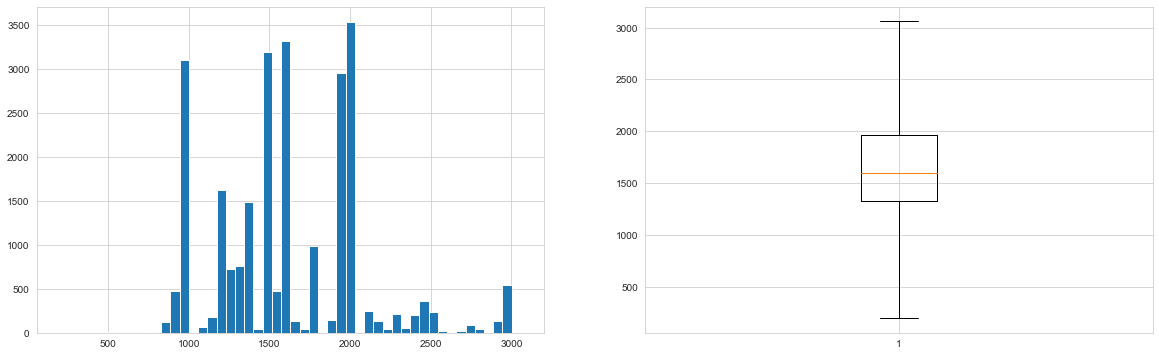

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=50)

plt.subplot(122)
plt.boxplot(df["engine_size"], whis=2.5)

plt.show()

In [ ]:
df.head(15).T

2   \
make_model                                       Mercedes-Benz A 45 AMG   
make                                                      Mercedes-Benz   
location              PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...   
price                                                         69900.000   
body_type                                                       Compact   
type                                                               Used   
warranty                                                         12.000   
mileage                                                       18900.000   
gearbox                                                       Automatic   
fuel_type                                                       Benzine   
paint                                                         Uni/basic   
seller                                                           Dealer   
engine_size                                                        1991   
cylinders                                                         4.000   
comfort_convenience   Air conditioning, Automatic climate control, P...   
entertainment_media                                               0.000   
safety_security       ABS, Central door lock, Driver-side airbag, El...   
full_service_history                                                 No   
age                                                               2.000   
power_kW                                                        310.000   
power_hp                                                        421.000   
cons_avg                                                          8.400   
cons_country                                                      8.400   
cons_city                                                        10.900   

                                                                     3   \
make_model                                       Mercedes-Benz A 35 AMG   
make                                                      Mercedes-Benz   
location              Carrer de Provença, 31 Local,  8029 BARCELONA, ES   
price                                                         46990.000   
body_type                                                       Compact   
type                                                               Used   
warranty                                                         12.000   
mileage                                                       18995.000   
gearbox                                                       Automatic   
fuel_type                                                       Benzine   
paint                                                         Uni/basic   
seller                                                           Dealer   
engine_size                                                        1991   
cylinders                                                         4.000   
comfort_convenience   Air conditioning, Automatic climate control, P...   
entertainment_media                                               1.000   
safety_security       ABS, Central door lock, Driver-side airbag, El...   
full_service_history                                                 No   
age                                                               2.000   
power_kW                                                        225.000   
power_hp                                                        306.000   
cons_avg                                                          7.300   
cons_country                                                      7.300   
cons_city                                                         9.300   

                                                                     4   \
make_model                                       Mercedes-Benz A 45 AMG   
make                                                      Mercedes-Benz   
location                         CARRIL ARAGONES 4,  30007 CASILLAS, ES   
price            

In [ ]:
df[(df["fuel_type"] == "Electric")][["make_model", "body_type", "gearbox"]]

make_model         body_type    gearbox
2247   Mercedes-Benz S 580             Sedan  Automatic
5041          Renault Clio           Compact  Automatic
5831        Renault Arkana             Coupe  Automatic
6804        Renault Megane             Sedan  Automatic
9152           Peugeot 508             Sedan  Automatic
9154           Peugeot 308             Sedan  Automatic
9604        Fiat New Panda           Compact     Manual
17699         Toyota RAV 4  Off-Road/Pick-up  Automatic
17701         Toyota RAV 4  Off-Road/Pick-up  Automatic
17718         Toyota RAV 4  Off-Road/Pick-up  Automatic
17720         Toyota RAV 4  Off-Road/Pick-up  Automatic
17721          Toyota C-HR  Off-Road/Pick-up  Automatic
21958            Ford Kuga  Off-Road/Pick-up  Automatic
22048            Ford Kuga  Off-Road/Pick-up  Automatic
24174       Hyundai Tucson  Off-Road/Pick-up  Automatic
26952           Volvo XC90  Off-Road/Pick-up  Automatic
27338           Volvo XC90  Off-Road/Pick-up  Automatic
28341            Volvo S60             Sedan  Automatic
28529            Volvo S90             Sedan  Automatic

In [ ]:
df[((df["fuel_type"] == "Benzine")|(df["fuel_type"] == "Diesel")|(df["fuel_type"] == "Liquid/Natural Gas"))][["fuel_type", "make_model"]].value_counts()

fuel_type           make_model              
Diesel              Volvo V40                   572
Benzine             Hyundai i30                 545
                    Seat Leon                   539
                    Dacia Sandero               535
                    Renault Megane              528
                    Opel Astra                  475
                    Volvo C70                   453
                    Ford Fiesta                 365
                    Ford Focus                  360
                    Fiat 500                    350
                    Seat Ibiza                  313
                    Toyota Yaris                311
                    Nissan Micra                304
                    Opel Corsa                  295
Diesel              Renault Megane              292
                    Peugeot 308                 274
Benzine             Renault Clio                267
                    Peugeot 308                 250
Diesel             

In [ ]:
df[(df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric")][["make_model", "body_type", "gearbox", "fuel_type"]]

make_model    body_type         gearbox           fuel_type
21160  Ford Mustang  Convertible       Automatic             Benzine
21162  Ford Mustang  Convertible       Automatic             Benzine
21167  Ford Mustang  Convertible          Manual             Benzine
21169  Ford Mustang  Convertible          Manual             Benzine
21172  Ford Mustang  Convertible          Manual             Benzine
21181  Ford Mustang  Convertible       Automatic             Benzine
21202  Ford Mustang  Convertible          Manual             Benzine
21203  Ford Mustang  Convertible       Automatic             Benzine
21204  Ford Mustang  Convertible       Automatic             Benzine
21212  Ford Mustang  Convertible       Automatic             Benzine
21221  Ford Mustang  Convertible          Manual             Benzine
21224  Ford Mustang  Convertible          Manual             Benzine
21233  Ford Mustang  Convertible  Semi-automatic             Benzine
21239  Ford Mustang  Convertible       Automatic             Benzine
21257  Ford Mustang  Convertible       Automatic             Benzine
21268  Ford Mustang  Convertible       Automatic             Benzine
21272  Ford Mustang  Convertible          Manual             Benzine
21277  Ford Mustang  Convertible       Automatic             Benzine
21287  Ford Mustang  Convertible          Manual             Benzine
21288  Ford Mustang  Convertible          Manual             Benzine
21300  Ford Mustang  Convertible          Manual             Benzine
21304  Ford Mustang  Convertible       Automatic             Benzine
21316  Ford Mustang  Convertible       Automatic             Benzine
21331  Ford Mustang  Convertible       Automatic             Benzine
21347  Ford Mustang  Convertible          Manual             Benzine
21352  Ford Mustang  Convertible          Manual             Benzine
21360  Ford Mustang  Convertible       Automatic             Benzine
21373  Ford Mustang  Convertible       Automatic             Benzine
21384  Ford Mustang  Convertible       Automatic             Benzine
21398  Ford Mustang  Convertible          Manual             Benzine
21402  Ford Mustang  Convertible       Automatic             Benzine
21420  Ford Mustang  Convertible       Automatic             Benzine
21423  Ford Mustang  Convertible  Semi-automatic             Benzine
21425  Ford Mustang  Convertible       Automatic             Benzine
21432  Ford Mustang  Convertible          Manual             Benzine
21434  Ford Mustang  Convertible          Manual             Benzine
21449  Ford Mustang  Convertible          Manual             Benzine
21456  Ford Mustang  Convertible       Automatic             Benzine
21460  Ford Mustang  Convertible          Manual             Benzine
21462  Ford Mustang  Convertible       Automatic             Benzine
21465  Ford Mustang  Convertible       Automatic             Benzine
21468  Ford Mustang  Convertible       Automatic             Benzine
21478  Ford Mustang  Convertible          Manual             Benzine
21483  Ford Mustang  Convertible       Automatic  Liquid/Natural Gas
21489  Ford Mustang  Convertible       Automatic             Benzine
21491  Ford Mustang  Convertible          Manual             Benzine
21492  Ford Mustang  Convertible       Automatic             Benzine
21494  Ford Mustang  Convertible          Manual             Benzine
21510  Ford Mustang  Convertible          Manual             Benzine
21513  Ford Mustang  Convertible       Automatic             Benzine
21514  Ford Mustang  Convertible       Automatic             Benzine
21518  Ford Mustang  Convertible          Manual             Benzine
21521  Ford Mustang  Convertible          Manual             Benzine
21522  Ford Mustang  Convertible       Automatic             Benzine
21527  Ford Mustang  Convertible       Automatic             Benzine
21529  Ford Mustang  Convertible       Automatic             Benzine
21540  Ford Mustang  Convertible       Automatic             Benzine
21542  

In [ ]:
ilk_bakis(df.cons_avg)

 Sütün Adi :cons_avg
 Nan deger sayisi : 0
 Nan yüzdelik sayisi : % (0, 2)
 Value_count_degeri : 5.000     1025
4.900     1005
4.500      880
5.100      858
4.800      748
4.700      720
4.200      700
5.600      695
5.400      692
0.000      670
4.300      664
5.300      653
4.100      637
5.200      634
4.600      610
5.700      609
3.800      588
5.500      568
5.900      558
4.000      553
4.400      536
6.300      512
6.000      482
6.400      461
5.800      434
3.700      431
3.600      355
7.000      352
6.500      331
7.400      330
6.200      326
6.100      324
3.900      320
6.600      309
3.400      301
6.900      290
6.700      287
7.100      280
6.800      239
7.200      238
7.300      235
8.000      226
8.400      220
7.600      196
3.500      196
7.500      190
7.800      186
7.700      178
8.200      168
3.300      163
9.000      123
8.300      114
9.200      111
8.900      111
8.600       94
3.000       94
9.800       94
1.700       91
9.700       82
9.600       80
7.9

In [ ]:
df.cons_avg.describe()

count   25726.000
mean        5.491
std         2.478
min         0.000
25%         4.400
50%         5.200
75%         6.400
max        99.900
Name: cons_avg, dtype: float64

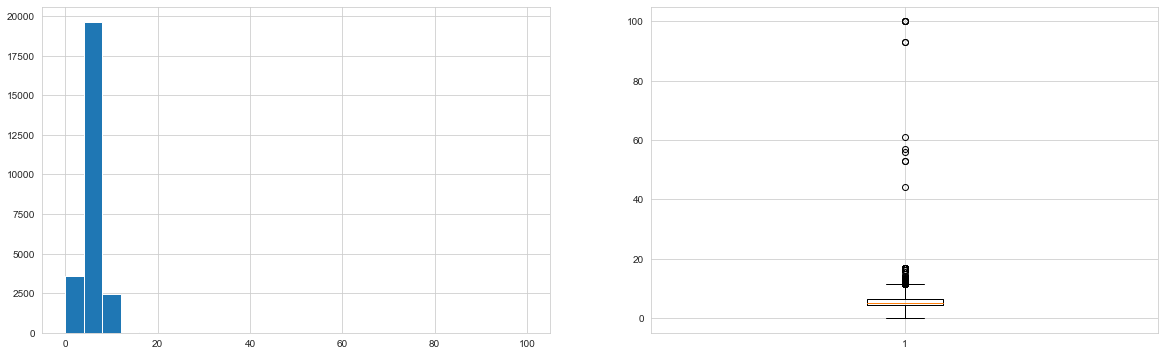

In [ ]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_avg, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_avg, whis=2.5)

plt.show()

In [ ]:
df["cons_avg"].sort_values(ascending=False).head(20)

265     99.900
18798   99.900
23004   99.900
18799   99.900
20995   93.000
21012   93.000
1771    61.000
6580    57.000
18546   56.000
23974   53.000
24144   53.000
19904   44.000
10465   16.700
10523   16.700
10376   16.700
10524   16.700
10373   16.700
10371   16.700
10421   16.700
614     16.700
Name: cons_avg, dtype: float64

In [ ]:
df.cons_avg.sort_values().tail(20)

10523   16.700
10524   16.700
10373   16.700
10329   16.700
10465   16.700
10328   16.700
10327   16.700
10371   16.700
19904   44.000
24144   53.000
23974   53.000
18546   56.000
6580    57.000
1771    61.000
21012   93.000
20995   93.000
23004   99.900
265     99.900
18798   99.900
18799   99.900
Name: cons_avg, dtype: float64

In [ ]:
df.groupby(["make_model", "body_type", "fuel_type", "cons_avg"]).mileage.describe()

count       mean  \
make_model   body_type        fuel_type          cons_avg                     
Dacia        Sedan            Benzine            5.600     1.000  59098.000   
             Station wagon    Benzine            5.600     1.000   2000.000   
Dacia Dokker Compact          Diesel             4.200     1.000 141100.000   
             Off-Road/Pick-up Benzine            6.300     1.000 100000.000   
                              Liquid/Natural Gas 6.300     1.000 100000.000   
...                                                          ...        ...   
Volvo XC90   Off-Road/Pick-up Diesel             9.100     2.000 237102.000   
                              Electric           5.700     2.000  12500.000   
             Sedan            Diesel             6.700     2.000  77824.500   
             Station wagon    Diesel             5.700     2.000 150000.000   
                                                 5.800     2.000 143550.000   

                                                                std  \
make_model   body_type        fuel_type          cons_avg             
Dacia        Sedan            Benzine            5.600          NaN   
             Station wagon    Benzine            5.600          NaN   
Dacia Dokker Compact          Diesel             4.200          NaN   
             Off-Road/Pick-up Benzine            6.300          NaN   
                              Liquid/Natural Gas 6.300          NaN   
...                                                             ...   
Volvo XC90   Off-Road/Pick-up Diesel             9.100        0.000   
                              Electric           5.700        0.000   
             Sedan            Diesel             6.700    12564.580   
             Station wagon    Diesel             5.700        0.000   
                                                 5.800        0.000   

                                                                 min  \
make_model   body_type        fuel_type          cons_avg              
Dacia        Sedan            Benzine            5.600     59098.000   
             Station wagon    Benzine            5.600      2000.000   
Dacia Dokker Compact          Diesel             4.200    141100.000   
             Off-Road/Pick-up Benzine            6.300    100000.000   
                              Liquid/Natural Gas 6.300    100000.000   
...                                                              ...   
Volvo XC90   Off-Road/Pick-up Diesel             9.100    237102.000   
                              Electric           5.700     12500.000   
             Sedan            Diesel             6.700     68940.000   
             Station wagon    Diesel             5.700    150000.000   
                                                 5.800    143550.000   

                                                                 25%  \
make_model   body_type        fuel_type          cons_avg              
Dacia        Sedan            Benzine            5.600     59098.000   
             Station wagon    Benzine            5.600      2000.000   
Dacia Dokker Compact          Diesel             4.200    141100.000   
             Off-Road/Pick-up Benzine            6.300    100000.000   
                              Liquid/Natural Gas 6.300    100000.000   
...                                                              ...   
Volvo XC90   Off-Road/Pick-up Diesel             9.100    237102.000   
                              Electric           5.700     12500.000   
             Sedan            Diesel             6.700     73382.250   
             Station wagon    Diesel             5.700    150000.000   
                                                 5.800    143550.000   

                                                                 50%  \
make_model   body_type        fuel_type          cons_avg              
Dacia        Sedan            Benzine            5.600     59098.000   
             Stat

In [ ]:
df.loc[df["cons_avg"] >= 10][["make_model", "age", "body_type", "gearbox",  "engine_size", "fuel_type", "cons_avg"]]\
                                 .sort_values(by=["cons_avg"], ascending=False)

make_model    age         body_type         gearbox  \
265         Mercedes-Benz A 180  2.000           Compact       Automatic   
23004                Ford Focus  3.000             Sedan       Automatic   
18798            Nissan Qashqai  3.000           Compact          Manual   
18799            Nissan Qashqai  5.000           Compact          Manual   
20995                Ford Focus  4.000           Compact          Manual   
21012                Ford Focus  3.000           Compact          Manual   
1771        Mercedes-Benz E 200  8.000     Station wagon       Automatic   
6580             Renault Megane  3.000     Station wagon          Manual   
18546              Toyota Yaris  0.000             Sedan          Manual   
23974              Hyundai KONA  1.000  Off-Road/Pick-up          Manual   
24144              Hyundai KONA  1.000  Off-Road/Pick-up          Manual   
19904            Nissan Qashqai  5.000  Off-Road/Pick-up          Manual   
10465                     Fiat  59.000             Coupe          Manual   
10524                     Fiat  47.000             Coupe          Manual   
10523                     Fiat  56.000             Coupe          Manual   
10493                     Fiat  57.000             Coupe          Manual   
10421                     Fiat  56.000             Coupe          Manual   
10406                     Fiat  55.000             Coupe          Manual   
10373                     Fiat  59.000             Coupe          Manual   
10371                     Fiat  56.000             Coupe          Manual   
10329                 Fiat Dino 51.000             Coupe          Manual   
10328                     Fiat  47.000             Coupe          Manual   
10327                     Fiat  55.000             Coupe          Manual   
614        Mercedes-Benz SL 280 45.000       Convertible       Automatic   
10376                     Fiat  58.000             Coupe          Manual   
7687                Peugeot 307 18.000       Convertible          Manual   
7689                Peugeot 404 60.000       Convertible          Manual   
7688                Peugeot 504 50.000       Convertible          Manual   
19917            Nissan Terrano 31.000  Off-Road/Pick-up          Manual   
17936              Toyota RAV 4 13.000  Off-Road/Pick-up          Manual   
8097                Peugeot 309 30.000             Coupe          Manual   
8032                Peugeot 309 30.000             Coupe          Manual   
20604             Nissan Gloria  2.000             Sedan       Automatic   
22038               Ford Bronco  0.000  Off-Road/Pick-up       Automatic   
21724              Ford Mustang 56.000             Coupe       Automatic   
3251                 Opel Monza 39.000             Coupe          Manual   
3263                 Opel Monza 44.000             Coupe       Automatic   
3379                 Opel Monza 43.000             Coupe          Manual   
3355                 Opel Monza 43.000             Coupe          Manual   
3324                 Opel Monza 43.000             Coupe          Manual   
3274                 Opel Monza 43.000             Coupe          Manual   
27149                Volvo XC90 16.000  Off-Road/Pick-up       Automatic   
26758                Volvo XC90 16.000  Off-Road/Pick-up       Automatic   
10513                Fiat Coupe 28.000             Coupe          Manual   
21434              Ford Mustang  4.000       Convertible          Manual   
21200                    Ford M 93.000       Convertible          Manual   
10294                Fiat Coupe 27.000             Coupe          Manual   
21360              Ford Mustang  4.000       Convertible       Automatic   
21527              Ford Mustang  4.000       Convertible       Automatic   
21489              Ford Mustang  3.000       Convertible       Automatic   
21304              Ford Mustang  4.000       Convertible       Automatic   
19287             Nissan Datsun 48.000             Coupe          Man

In [ ]:
df.loc[df.make_model == "Mercedes-Benz A 180"][["make_model", "age", "body_type", "gearbox", "engine_size", "fuel_type", "cons_avg"]]

make_model    age body_type    gearbox  engine_size fuel_type  \
13    Mercedes-Benz A 180  2.000   Compact     Manual         1461    Diesel   
15    Mercedes-Benz A 180 12.000   Compact     Manual         1991    Diesel   
18    Mercedes-Benz A 180  2.000   Compact  Automatic         1461    Diesel   
20    Mercedes-Benz A 180  4.000   Compact  Automatic         1461    Diesel   
21    Mercedes-Benz A 180  2.000   Compact  Automatic         1461    Diesel   
22    Mercedes-Benz A 180  1.000   Compact     Manual         1332   Benzine   
25    Mercedes-Benz A 180  4.000   Compact  Automatic         1461    Diesel   
31    Mercedes-Benz A 180  2.000   Compact  Automatic         1332   Benzine   
34    Mercedes-Benz A 180  5.000   Compact  Automatic         1595   Benzine   
35    Mercedes-Benz A 180  2.000   Compact     Manual         1332   Benzine   
36    Mercedes-Benz A 180  4.000   Compact  Automatic         1461    Diesel   
38    Mercedes-Benz A 180  3.000   Compact  Automatic         1332   Benzine   
39    Mercedes-Benz A 180  8.000   Compact     Manual         1461    Diesel   
40    Mercedes-Benz A 180  3.000   Compact     Manual         1461    Diesel   
42    Mercedes-Benz A 180 11.000   Compact  Automatic         1699   Benzine   
43    Mercedes-Benz A 180  4.000   Compact  Automatic         1461    Diesel   
45    Mercedes-Benz A 180  1.000   Compact  Automatic         1461    Diesel   
46    Mercedes-Benz A 180  3.000   Compact  Automatic         1461    Diesel   
47    Mercedes-Benz A 180  6.000   Compact  Automatic         1461    Diesel   
48    Mercedes-Benz A 180  4.000   Compact  Automatic         1461    Diesel   
49    Mercedes-Benz A 180  2.000   Compact  Automatic         1332   Benzine   
52    Mercedes-Benz A 180  3.000   Compact     Manual         1461    Diesel   
53    Mercedes-Benz A 180  4.000   Compact  Automatic         1461    Diesel   
54    Mercedes-Benz A 180  3.000   Compact  Automatic         1461    Diesel   
56    Mercedes-Benz A 180  4.000   Compact  Automatic         1461    Diesel   
57    Mercedes-Benz A 180  2.000   Compact  Automatic         1332   Benzine   
59    Mercedes-Benz A 180  2.000   Compact  Automatic         1332   Benzine   
61    Mercedes-Benz A 180  4.000   Compact  Automatic         1461    Diesel   
62    Mercedes-Benz A 180  2.000   Compact  Automatic         1332   Benzine   
74    Mercedes-Benz A 180  3.000   Compact  Automatic         1461    Diesel   
75    Mercedes-Benz A 180  4.000   Compact  Automatic         1595   Benzine   
76    Mercedes-Benz A 180 10.000   Compact     Manual         1699   Benzine   
77    Mercedes-Benz A 180  4.000   Compact  Automatic         1461    Diesel   
83    Mercedes-Benz A 180  0.000   Compact  Automatic         1332   Benzine   
84    Mercedes-Benz A 180  3.000   Compact  Automatic         1332   Benzine   
85    Mercedes-Benz A 180  7.000   Compact     Manual         1461    Diesel   
91    Mercedes-Benz A 180 10.000   Compact  Automatic         1991    Diesel   
105   Mercedes-Benz A 180  8.000   Compact     Manual         1461    Diesel   
106   Mercedes-Benz A 180  5.000   Compact  Automatic         1461    Diesel   
109   Mercedes-Benz A 180  6.000   Compact     Manual         1461    Diesel   
110   Mercedes-Benz A 180  6.000   Compact     Manual         1461    Diesel   
116   Mercedes-Benz A 180  8.000   Compact  Automatic         1595   Benzine   
119   Mercedes-Benz A 180 10.000   Compact     Manual         1461    Diesel   
128   Mercedes-Benz A 180  5.000   Compact     Manual         1461    Diesel   
132   Mercedes-Benz A 180 16.000   Compact  Automatic         1991    Diesel   
133   Mercedes-Benz A 180 10.000   Compact     Manual         1991    Diesel   
134   Mercedes-Benz A 180  3.000   Compact  Automatic         1461    Diesel   
135   Mercedes-Benz A 180  8.000   Compact  Automatic         1500    Diesel   
139   Mercedes-Benz A 180  3.000   Compact  Automatic         1461    Diesel   
147   Mercedes-

In [ ]:
cond_cons_avg = (df["cons_avg"] >= 20)
df.loc[cond_cons_avg, "cons_avg"] = np.nan

In [ ]:
df["cons_avg"].isnull().sum()

12

In [ ]:
fill_with_mode(df, "make_model")

COLUMN NAME    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  500
--------------------------------
Renault Megane              825
Seat Leon                   779
Volvo V40                   730
Dacia Sandero               710
Hyundai i30                 695
Volvo C70                   684
Opel Astra                  655
Peugeot 308                 527
Ford Focus                  492
Nissan Qashqai              444
Seat Ibiza                  432
Fiat Tipo                   419
Renault Clio                405
Ford Fiesta                 396
Fiat 500                    391
Skoda Octavia               368
Nissan Micra                364
Fiat 500X                   351
Volvo XC60                  349
Dacia Duster                340
Toyota Yaris                329
Opel Corsa                  326
Volvo V60                   307
Opel Insignia               287
Skoda Fabia                 242
Peugeot 208                 240
Fiat 50

In [ ]:
fill_with_mode(df, "body_type")

COLUMN NAME    :  body_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
Station wagon       5294
Compact             5061
Off-Road/Pick-up    5053
Sedan               4547
Coupe               3067
Convertible         2704
Name: body_type, dtype: int64


In [ ]:
fill_with_mode(df, "cons_avg")

COLUMN NAME    :  cons_avg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  145
--------------------------------
6.000     1177
4.900     1063
5.000     1063
4.500      938
5.100      933
0.000      795
4.800      785
4.200      754
4.700      741
5.600      734
4.300      710
5.400      706
5.300      705
4.100      699
5.200      682
4.600      647
5.700      636
3.800      621
5.500      591
5.900      583
4.000      582
4.400      573
6.300      527
6.400      475
5.800      459
3.700      456
3.600      370
7.000      362
7.400      352
6.100      344
6.500      343
6.200      340
3.900      337
6.600      318
3.400      313
6.900      307
7.100      298
6.700      293
6.800      254
7.300      245
7.200      245
8.400      236
8.000      226
7.600      209
7.500      203
3.500      202
7.800      193
7.700      186
3.300      167
8.200      158
8.900      128
8.300      125
9.000      124
9.200      103
8.600      102
10.100     100
3

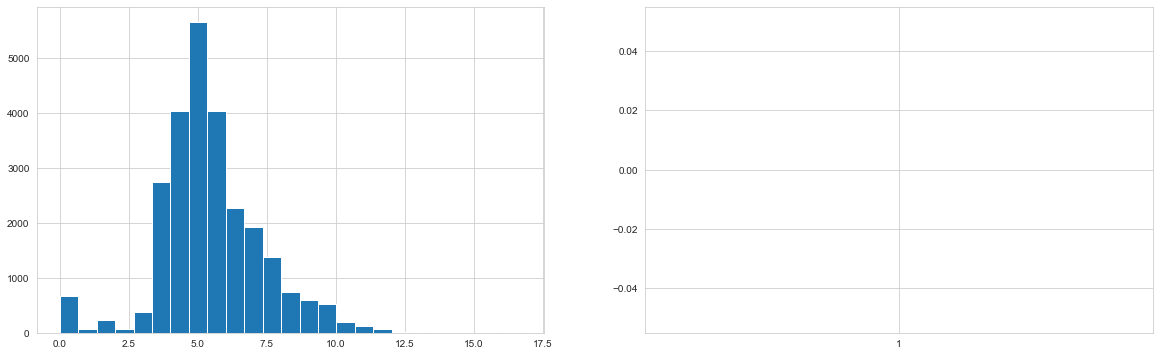

In [ ]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_avg, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_avg, whis=2.5)

plt.show()

In [ ]:
ilk_bakis(df.age)

 Sütün Adi :age
 Nan deger sayisi : 0
 Nan yüzdelik sayisi : % (0, 2)
 Value_count_degeri : 3.000       3387
4.000       3227
0.000       2656
1.000       2552
2.000       2272
5.000       2227
6.000       1367
7.000       1140
8.000        875
9.000        634
10.000       605
11.000       586
12.000       497
15.000       430
14.000       400
13.000       380
16.000       330
17.000       228
18.000       216
19.000       195
21.000       179
20.000       170
22.000       152
23.000       131
24.000        83
25.000        76
28.000        72
27.000        70
26.000        61
31.000        56
29.000        50
30.000        50
32.000        47
34.000        28
33.000        20
35.000        18
36.000        17
44.000        16
56.000        15
49.000        15
50.000        14
55.000        14
37.000        13
39.000        13
47.000        12
51.000        11
45.000         9
52.000         9
43.000         8
46.000         8
57.000         7
53.000         7
54.000         7
41.000 

In [ ]:
df["age"].describe()

count   25726.000
mean        6.462
std         7.678
min      -180.000
25%         2.000
50%         4.000
75%         8.000
max       122.000
Name: age, dtype: float64

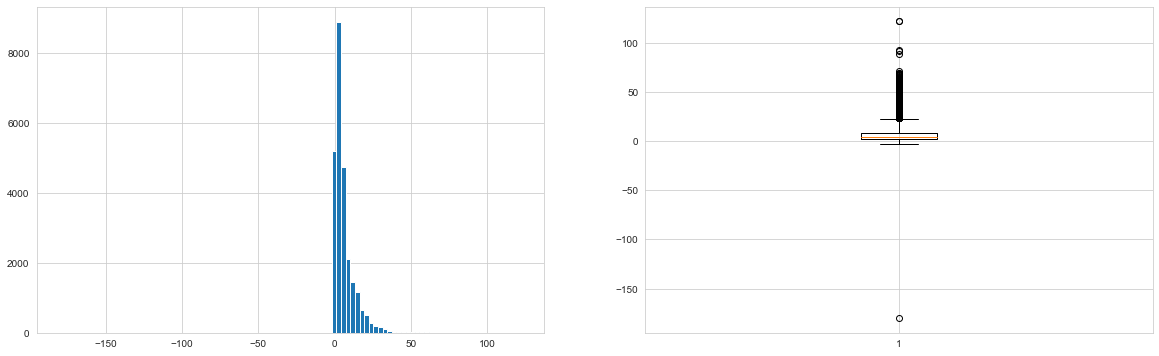

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["age"], bins=100)

plt.subplot(122)
plt.boxplot(df["age"], whis=2.5)

plt.show()

In [ ]:
df["age"].sort_values(ascending=False).head(20)

24783   122.000
22058   122.000
21200    93.000
8043     92.000
10009    89.000
3358     72.000
5300     70.000
771      70.000
26698    69.000
26523    69.000
26439    67.000
26614    67.000
9120     66.000
3258     65.000
9114     64.000
786      64.000
13957    63.000
26461    62.000
9280     62.000
10335    62.000
Name: age, dtype: float64

In [ ]:
df["age"].sort_values(ascending=1).head(20)

7011    -180.000
9764      -3.000
19213     -1.000
14135      0.000
16464      0.000
16460      0.000
16437      0.000
4277       0.000
16408      0.000
16406      0.000
16401      0.000
16389      0.000
16383      0.000
4294       0.000
16382      0.000
16377      0.000
16374      0.000
4299       0.000
16365      0.000
16364      0.000
Name: age, dtype: float64

In [ ]:
df.groupby(["make_model", "body_type", "type"]).age.describe()

count   mean  \
make_model               body_type        type                            
Dacia                    Sedan            Used             1.000 47.000   
                         Station wagon    Demonstration    1.000  0.000   
Dacia Dokker             Compact          Used             1.000  4.000   
                         Off-Road/Pick-up Used             2.000  4.000   
                         Station wagon    Used            45.000  4.622   
Dacia Duster             Convertible      Used             1.000  3.000   
                         Off-Road/Pick-up Demonstration   11.000  0.091   
                                          Employee's car   2.000  0.500   
                                          Pre-registered  27.000  0.185   
                                          Used           273.000  3.930   
                         Sedan            Used             3.000  4.000   
                         Station wagon    Used            23.000  4.957   
Dacia Jogger             Off-Road/Pick-up Pre-registered   1.000  0.000   
                         Sedan            Demonstration    1.000  0.000   
                         Station wagon    Demonstration    8.000  0.000   
                                          Pre-registered   7.000  0.000   
                                          Used            69.000  0.000   
Dacia Lodgy              Compact          Used             1.000  3.000   
                         Sedan            Employee's car   1.000  0.000   
                                          Used             1.000  3.000   
                         Station wagon    Employee's car   1.000  0.000   
                                          Pre-registered   1.000  0.000   
                                          Used            65.000  4.631   
Dacia Logan              Compact          Used            13.000  5.538   
                         Sedan            Pre-registered   3.000  0.000   
                                          Used            31.000  7.419   
                         Station wagon    Used           145.000  6.317   
Dacia Sandero            Compact          Demonstration    8.000  0.000   
                                          Pre-registered  39.000  0.179   
                                          Used           291.000  4.639   
                         Convertible      Used             1.000  3.000   
                         Coupe            Used             2.000  5.500   
                         Off-Road/Pick-up Employee's car   3.000  1.000   
                                          Pre-registered  29.000  0.000   
                                          Used            17.000  3.882   
                         Sedan            Demonstration    7.000  0.286   
                                          Employee's car   2.000  1.000   
                                          Pre-registered  40.000  0.000   
                                          Used           267.000  4.730   
                         Station wagon    Used             4.000  5.000   
Fiat                     Convertible      Used             4.000 25.250   
                         Coupe            Used            16.000 45.938   
                         Sedan            Used             1.000 59.000   
                         Station wagon    Used             3.000 24.667   
Fiat 124 Coupè           Coupe            Used             9.000 50.556   
Fiat 124 Spider          Convertible      Used            58.000  5.948   
                         Coupe            Used            38.000  6.579   
Fiat 126                 Compact          Used             2.000 29.000   
                         Coupe            Used             1.000 36.000   
                         Sedan            Used             1.000 39.000   
Fiat 127                 Coupe            Used             1.000 47.000   
Fiat 128                 Coupe            Used             1.000 49.000   
         

In [ ]:
df.loc[df["age"] > 20][["make_model", "age",  "body_type", "gearbox", "engine_size", "fuel_type", "cons_avg"]]\
                                 .sort_values(by=["age"], ascending=False)

make_model     age         body_type         gearbox  \
24783          Hyundai IONIQ 122.000             Sedan       Automatic   
22058            Ford Bronco 122.000  Off-Road/Pick-up       Automatic   
21200                 Ford M  93.000       Convertible          Manual   
8043                Peugeot   92.000             Coupe          Manual   
10009                  Fiat   89.000       Convertible          Manual   
3358                   Opel   72.000             Coupe          Manual   
771        Mercedes-Benz 220  70.000       Convertible          Manual   
5300                Renault   70.000       Convertible       Automatic   
26523                 Volvo   69.000             Coupe          Manual   
26698                 Volvo   69.000             Coupe          Manual   
26614                 Volvo   67.000             Coupe          Manual   
26439                 Volvo   67.000             Coupe          Manual   
9120                Peugeot   66.000             Sedan          Manual   
3258             Opel Rekord  65.000             Coupe          Manual   
786        Mercedes-Benz 220  64.000       Convertible          Manual   
9114                Peugeot   64.000             Sedan          Manual   
13957          Skoda Felicia  63.000       Convertible          Manual   
26461            Volvo PV544  62.000             Coupe          Manual   
9280                Peugeot   62.000             Sedan          Manual   
10335               Fiat 500  62.000             Coupe          Manual   
26636            Volvo PV544  62.000             Coupe          Manual   
26609                 Volvo   61.000             Coupe          Manual   
5534          Renault Spider  61.000       Convertible          Manual   
26392            Volvo P1800  61.000             Coupe          Manual   
26434                 Volvo   61.000             Coupe          Manual   
13959          Skoda Felicia  61.000       Convertible          Manual   
26567            Volvo P1800  61.000             Coupe          Manual   
7689             Peugeot 404  60.000       Convertible          Manual   
848        Mercedes-Benz 220  59.000             Coupe          Manual   
10465                  Fiat   59.000             Coupe          Manual   
11569                  Fiat   59.000             Sedan          Manual   
10168               Fiat 500  59.000       Convertible          Manual   
10373                  Fiat   59.000             Coupe          Manual   
5670     Renault Alpine A110  58.000             Coupe          Manual   
10376                  Fiat   58.000             Coupe          Manual   
3248             Opel Rekord  58.000             Coupe          Manual   
26586            Volvo P1800  57.000             Coupe          Manual   
9627         Fiat 500 Abarth  57.000           Compact          Manual   
26581            Volvo P1800  57.000             Coupe          Manual   
26406            Volvo P1800  57.000             Coupe          Manual   
10506               Fiat 600  57.000             Coupe          Manual   
26411            Volvo P1800  57.000             Coupe          Manual   
10493                  Fiat   57.000             Coupe          Manual   
10477               Fiat 850  56.000             Coupe          Manual   
452        Mercedes-Benz 230  56.000       Convertible          Manual   
26431            Volvo P1800  56.000             Coupe          Manual   
26539           Volvo Amazon  56.000             Coupe          Manual   
10421                  Fiat   56.000             Coupe          Manual   
10462             Fiat Coupe  56.000             Coupe          Manual   
26714           Volvo Amazon  56.000             Coupe          Manual   
10371                  Fiat   56.000             Coupe          Manual   
12208               Seat Mii  56.000       Convertible          Manual   
691        Mercedes-Benz 280  56.000       Convertible          Manual   
21724           Ford M

In [ ]:

car_counts = df['age'].value_counts()
car_counts

3.000       3387
4.000       3227
0.000       2656
1.000       2552
2.000       2272
5.000       2227
6.000       1367
7.000       1140
8.000        875
9.000        634
10.000       605
11.000       586
12.000       497
15.000       430
14.000       400
13.000       380
16.000       330
17.000       228
18.000       216
19.000       195
21.000       179
20.000       170
22.000       152
23.000       131
24.000        83
25.000        76
28.000        72
27.000        70
26.000        61
31.000        56
29.000        50
30.000        50
32.000        47
34.000        28
33.000        20
35.000        18
36.000        17
44.000        16
56.000        15
49.000        15
50.000        14
55.000        14
37.000        13
39.000        13
47.000        12
51.000        11
45.000         9
52.000         9
43.000         8
46.000         8
57.000         7
53.000         7
54.000         7
41.000         6
38.000         6
61.000         6
40.000         5
48.000         5
59.000        

In [ ]:
drop_old_cars_index = df.loc[(df["age"] > 20) | (df["age"] < 0)].index
drop_old_cars_index

Int64Index([   88,   282,   452,   487,   516,   538,   540,   542,   556,
              587,
            ...
            28463, 28496, 28504, 28511, 28560, 28564, 28573, 28602, 28614,
            28615],
           dtype='int64', length=1352)

In [ ]:
print(df.shape)
df.drop(drop_old_cars_index, axis=0, inplace=True)
print(df.shape)

(25726, 25)
(24374, 25)


In [ ]:
car_age_counts = df['age'].value_counts()
car_age_counts

3.000     3387
4.000     3227
0.000     2656
1.000     2552
2.000     2272
5.000     2227
6.000     1367
7.000     1140
8.000      875
9.000      634
10.000     605
11.000     586
12.000     497
15.000     430
14.000     400
13.000     380
16.000     330
17.000     228
18.000     216
19.000     195
20.000     170
Name: age, dtype: int64

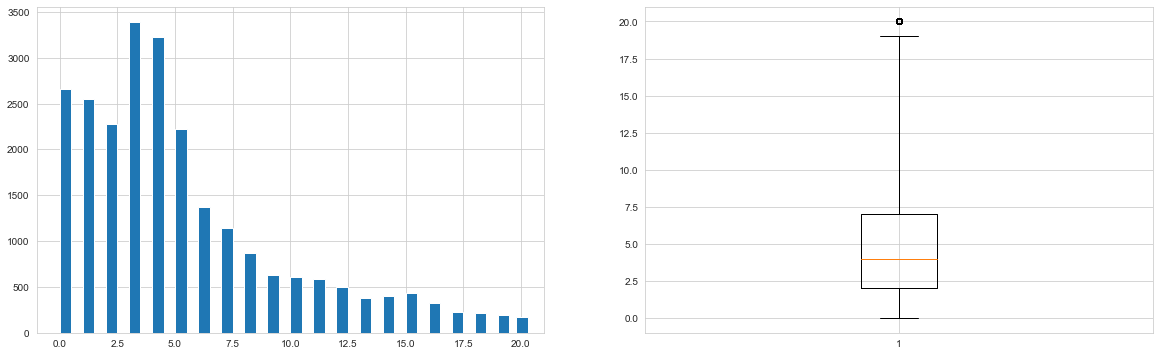

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["age"], bins=100, width=0.5)

plt.subplot(122)
plt.boxplot(df["age"], whis=2.5)

plt.show()

In [ ]:
ilk_bakis(df.power_kW)

 Sütün Adi :power_kW
 Nan deger sayisi : 0
 Nan yüzdelik sayisi : % (0, 2)
 Value_count_degeri : 110.000    1947
96.000     1389
81.000     1129
88.000     1127
66.000     1041
85.000      971
103.000     937
140.000     901
74.000      892
51.000      694
70.000      661
100.000     565
55.000      479
92.000      458
147.000     398
125.000     382
120.000     347
80.000      301
135.000     291
132.000     286
173.000     269
130.000     260
90.000      242
82.000      240
118.000     236
84.000      227
77.000      221
115.000     211
67.000      206
145.000     201
63.000      185
97.000      183
53.000      178
221.000     163
150.000     160
59.000      145
180.000     142
206.000     137
73.000      128
60.000      128
190.000     127
202.000     127
121.000     123
107.000     120
44.000      120
184.000     111
104.000     111
54.000      111
72.000      109
143.000     108
75.000      108
228.000     102
68.000      102
50.000       96
165.000      95
52.000       92
288.000

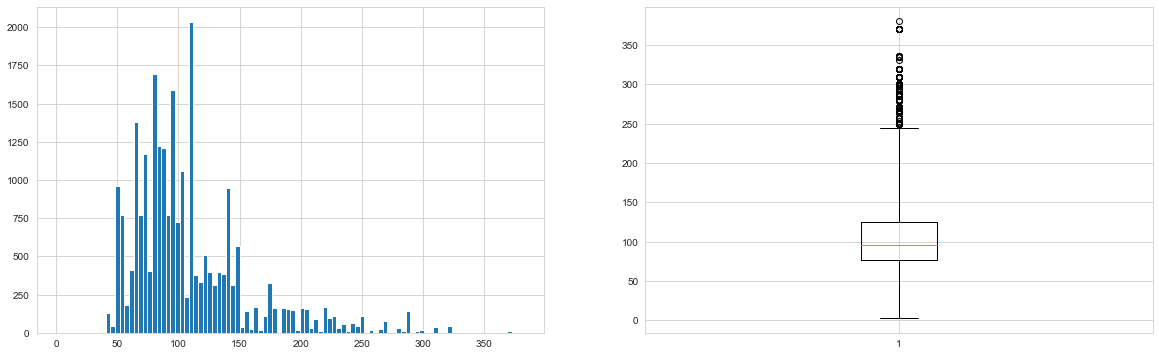

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["power_kW"], bins=100)

plt.subplot(122)
plt.boxplot(df["power_kW"], whis=2.5)

plt.show()

In [ ]:
df["power_kW"].sort_values(ascending=False).head(20)

2114    380.000
2064    370.000
2296    370.000
2032    370.000
2029    370.000
2026    370.000
2159    370.000
2244    370.000
2247    370.000
2071    370.000
1839    336.000
1477    336.000
906     336.000
2261    335.000
2024    335.000
2017    335.000
2216    335.000
21947   331.000
883     320.000
934     320.000
Name: power_kW, dtype: float64

In [ ]:
df["power_kW"].sort_values(ascending=1).head(20)

22101    3.000
24429    6.000
5545     7.000
9651    40.000
11177   40.000
11174   40.000
16684   40.000
9589    40.000
7326    40.000
17456   40.000
5171    43.000
2656    43.000
4915    43.000
5146    43.000
5137    43.000
5091    43.000
5155    43.000
13757   44.000
13771   44.000
13747   44.000
Name: power_kW, dtype: float64

In [ ]:
df.groupby(["make_model", "body_type", "fuel_type"]).power_kW.describe()

count    mean  \
make_model               body_type        fuel_type                            
Dacia                    Station wagon    Benzine              1.000  81.000   
Dacia Dokker             Compact          Diesel               1.000  66.000   
                         Off-Road/Pick-up Benzine              1.000  75.000   
                                          Liquid/Natural Gas   1.000  75.000   
                         Station wagon    Benzine             17.000  82.176   
                                          Diesel              23.000  61.435   
                                          Liquid/Natural Gas   5.000  70.400   
Dacia Duster             Convertible      Liquid/Natural Gas   1.000  84.000   
                         Off-Road/Pick-up Benzine            126.000  91.794   
                                          Diesel             160.000  81.263   
                                          Liquid/Natural Gas  27.000  76.704   
                         Sedan            Benzine              1.000  92.000   
                                          Diesel               1.000  80.000   
                                          Liquid/Natural Gas   1.000  74.000   
                         Station wagon    Benzine              5.000  91.800   
                                          Diesel              17.000  80.412   
                                          Liquid/Natural Gas   1.000  67.000   
Dacia Jogger             Off-Road/Pick-up Liquid/Natural Gas   1.000  74.000   
                         Sedan            Benzine              1.000  81.000   
                         Station wagon    Benzine             79.000  80.911   
                                          Liquid/Natural Gas   5.000  74.000   
Dacia Lodgy              Compact          Diesel               1.000  85.000   
                         Sedan            Diesel               1.000  85.000   
                                          Liquid/Natural Gas   1.000  75.000   
                         Station wagon    Benzine             32.000  82.594   
                                          Diesel              33.000  80.636   
                                          Liquid/Natural Gas   2.000  70.500   
Dacia Logan              Compact          Benzine              8.000  54.875   
                                          Diesel               4.000  63.250   
                                          Liquid/Natural Gas   1.000  66.000   
                         Sedan            Benzine             28.000  55.357   
                                          Diesel               3.000  61.333   
                                          Liquid/Natural Gas   3.000  71.333   
                         Station wagon    Benzine             99.000  62.212   
                                          Diesel              34.000  64.353   
                                          Liquid/Natural Gas  12.000  67.333   
Dacia Sandero            Compact          Benzine            250.000  64.540   
                                          Diesel              77.000  65.636   
                                          Liquid/Natural Gas  11.000  72.636   
                         Convertible      Benzine              1.000  66.000   
                         Coupe            Benzine              2.000  60.500   
                         Off-Road/Pick-up Benzine             40.000  66.650   
                                          Diesel               2.000  62.500   
                                          Liquid/Natural Gas   7.000  73.000   
                         Sedan            Benzine            240.000  63.617   
                                          Diesel              58.000  66.000   
                                          Liquid/Natural Gas  18.000  65.889   
                         Station wagon    Benzine              2.000  60.500   
                                          Diesel               

In [ ]:
df.loc[(df["power_kW"] == 9) | (df["power_kW"] == 12)][["make_model", "age", "body_type", "gearbox",  "engine_size", "fuel_type", "cons_avg", "power_kW"]]\
                                 .sort_values(by=["power_kW"], ascending=False)

Empty DataFrame
Columns: [make_model, age, body_type, gearbox, engine_size, fuel_type, cons_avg, power_kW]
Index: []

In [ ]:
df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "engine_size", "fuel_type", "cons_avg", "power_kW"]]

make_model    age      body_type    gearbox  engine_size  \
4783  Renault Megane  1.000        Compact     Manual         1332   
4786  Renault Megane  1.000        Compact  Automatic         1798   
4789  Renault Megane  4.000        Compact  Automatic         1500   
4791  Renault Megane  7.000        Compact     Manual         1461   
4793  Renault Megane  8.000        Compact     Manual         1461   
4794  Renault Megane 18.000        Compact  Automatic         1598   
4796  Renault Megane  4.000        Compact  Automatic         1500   
4798  Renault Megane  6.000        Compact  Automatic         1618   
4800  Renault Megane 14.000        Compact     Manual         1870   
4801  Renault Megane  4.000        Compact  Automatic         1500   
4803  Renault Megane 15.000        Compact     Manual         1461   
4807  Renault Megane  9.000        Compact     Manual         1198   
4815  Renault Megane 15.000        Compact     Manual         1995   
4817  Renault Megane  5.000        Compact     Manual         1461   
4820  Renault Megane  5.000        Compact     Manual         1197   
4834  Renault Megane  7.000        Compact     Manual         1197   
4839  Renault Megane  4.000        Compact  Automatic         1598   
4842  Renault Megane  3.000        Compact     Manual         1332   
4847  Renault Megane  2.000        Compact     Manual         1461   
4855  Renault Megane  1.000        Compact  Automatic         1598   
4861  Renault Megane  3.000        Compact     Manual         1461   
4874  Renault Megane  1.000        Compact  Automatic         1461   
4889  Renault Megane  1.000        Compact  Automatic         1798   
4930  Renault Megane 11.000        Compact  Automatic         1995   
4931  Renault Megane  4.000        Compact  Automatic         1618   
4937  Renault Megane  4.000        Compact  Automatic         1330   
4941  Renault Megane  4.000        Compact     Manual         1461   
4944  Renault Megane  2.000        Compact     Manual         1198   
4945  Renault Megane  9.000        Compact     Manual         1461   
4946  Renault Megane 14.000        Compact  Automatic         1598   
4951  Renault Megane  4.000        Compact     Manual         1461   
4959  Renault Megane 15.000        Compact     Manual         2000   
4965  Renault Megane  5.000        Compact  Automatic         1618   
4967  Renault Megane  3.000        Compact     Manual         1500   
4968  Renault Megane  6.000        Compact  Automatic         1600   
4971  Renault Megane  4.000        Compact     Manual         1198   
4979  Renault Megane  1.000        Compact  Automatic         1798   
4984  Renault Megane  5.000        Compact  Automatic         1618   
4990  Renault Megane  4.000        Compact  Automatic         1300   
4994  Renault Megane  5.000        Compact     Manual         1461   
4997  Renault Megane  3.000        Compact  Automatic         1332   
4999  Renault Megane  3.000        Compact  Automatic         1798   
5000  Renault Megane  4.000        Compact     Manual         1598   
5001  Renault Megane 18.000        Compact     Manual         1500   
5004  Renault Megane  6.000        Compact     Manual         1618   
5006  Renault Megane  6.000        Compact     Manual         1198   
5008  Renault Megane  5.000        Compact     Manual         1461   
5009  Renault Megane 18.000        Compact     Manual         1461   
5010  Renault Megane 13.000        Compact     Manual         1998   
5011  Renault Megane  1.000        Compact  Automatic         1461   
5013  Renault Megane  2.000        Compact     Manual         1200   
5018  Renault Megane  5.000        Compact     Manual         1461   
5031  Renault Megane  2.000        Compact  Automatic         1300   
5042  Renault Megane  5.000        Compact     Manual         1197   
5048  Renault Megane 16.000        Compact     Manual         1598   
5052  Renault Megane  9.000        Compact     Manual         1598   
5055  Renault Megane

In [ ]:
car_kW_counts = df['power_kW'].value_counts()
car_kW_counts

110.000    1947
96.000     1389
81.000     1129
88.000     1127
66.000     1041
85.000      971
103.000     937
140.000     901
74.000      892
51.000      694
70.000      661
100.000     565
55.000      479
92.000      458
147.000     398
125.000     382
120.000     347
80.000      301
135.000     291
132.000     286
173.000     269
130.000     260
90.000      242
82.000      240
118.000     236
84.000      227
77.000      221
115.000     211
67.000      206
145.000     201
63.000      185
97.000      183
53.000      178
221.000     163
150.000     160
59.000      145
180.000     142
206.000     137
73.000      128
60.000      128
190.000     127
202.000     127
121.000     123
107.000     120
44.000      120
184.000     111
104.000     111
54.000      111
72.000      109
143.000     108
75.000      108
228.000     102
68.000      102
50.000       96
165.000      95
52.000       92
288.000      90
99.000       89
133.000      85
169.000      85
62.000       84
117.000      82
213.000 

In [ ]:
car_kW_counts[car_kW_counts < 10]

224.000    9
300.000    9
215.000    9
127.000    9
69.000     9
298.000    9
370.000    9
158.000    9
285.000    9
182.000    8
234.000    8
124.000    8
149.000    7
235.000    7
131.000    7
168.000    7
294.000    7
37.000     6
174.000    6
271.000    6
111.000    6
109.000    6
295.000    6
18.000     5
33.000     5
188.000    5
32.000     5
126.000    5
203.000    5
193.000    5
146.000    5
148.000    5
286.000    5
240.000    4
35.000     4
212.000    4
13.000     4
335.000    4
214.000    4
167.000    3
172.000    3
106.000    3
266.000    3
46.000     3
17.000     3
336.000    3
279.000    3
58.000     3
232.000    3
45.000     3
89.000     3
29.000     3
25.000     3
196.000    3
229.000    3
36.000     3
258.000    3
299.000    2
38.000     2
227.000    2
161.000    2
207.000    2
380.000    1
15.000     1
1.000      1
7.000      1
21.000     1
237.000    1
412.000    1
331.000    1
343.000    1
3.000      1
267.000    1
6.000      1
23.000     1
363.000    1
327.000    1

In [ ]:
%pprint

less_freq_kW = car_kW_counts[car_kW_counts < 10].index.to_list()
less_freq_kW

Pretty printing has been turned OFF


[215.0, 298.0, 123.0, 102.0, 370.0, 220.0, 224.0, 285.0, 239.0, 47.0, 234.0, 158.0, 300.0, 182.0, 127.0, 166.0, 153.0, 168.0, 235.0, 294.0, 43.0, 40.0, 131.0, 174.0, 271.0, 69.0, 111.0, 295.0, 286.0, 193.0, 203.0, 126.0, 148.0, 188.0, 94.0, 335.0, 214.0, 149.0, 146.0, 212.0, 178.0, 266.0, 240.0, 106.0, 196.0, 336.0, 58.0, 232.0, 229.0, 258.0, 172.0, 167.0, 227.0, 299.0, 279.0, 124.0, 46.0, 7.0, 222.0, 216.0, 6.0, 109.0, 267.0, 3.0, 236.0, 331.0, 380.0, 237.0, 207.0, 45.0, 254.0, 89.0, 242.0, 189.0]

In [ ]:
df["power_kW"].replace(less_freq_kW, np.nan, inplace=True)

In [ ]:
df["power_kW"].isnull().sum()

330

In [ ]:
fill_with_mode(df, "make_model")

COLUMN NAME    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  407
--------------------------------
Renault Megane              796
Seat Leon                   776
Volvo V40                   730
Dacia Sandero               710
Hyundai i30                 695
Opel Astra                  620
Volvo C70                   538
Peugeot 308                 527
Ford Focus                  490
Nissan Qashqai              444
Seat Ibiza                  429
Fiat Tipo                   416
Renault Clio                398
Ford Fiesta                 395
Fiat 500                    385
Skoda Octavia               363
Nissan Micra                362
Fiat 500X                   351
Volvo XC60                  349
Dacia Duster                340
Toyota Yaris                324
Opel Corsa                  324
Volvo V60                   307
Opel Insignia               287
Skoda Fabia                 242
Peugeot 208                 240
Fiat 50

In [ ]:
fill_with_mode(df, "make_model")

COLUMN NAME    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  407
--------------------------------
Renault Megane              796
Seat Leon                   776
Volvo V40                   730
Dacia Sandero               710
Hyundai i30                 695
Opel Astra                  620
Volvo C70                   538
Peugeot 308                 527
Ford Focus                  490
Nissan Qashqai              444
Seat Ibiza                  429
Fiat Tipo                   416
Renault Clio                398
Ford Fiesta                 395
Fiat 500                    385
Skoda Octavia               363
Nissan Micra                362
Fiat 500X                   351
Volvo XC60                  349
Dacia Duster                340
Toyota Yaris                324
Opel Corsa                  324
Volvo V60                   307
Opel Insignia               287
Skoda Fabia                 242
Peugeot 208                 240
Fiat 50

In [ ]:
fill_with_mode(df, "make_model")

COLUMN NAME    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  407
--------------------------------
Renault Megane              796
Seat Leon                   776
Volvo V40                   730
Dacia Sandero               710
Hyundai i30                 695
Opel Astra                  620
Volvo C70                   538
Peugeot 308                 527
Ford Focus                  490
Nissan Qashqai              444
Seat Ibiza                  429
Fiat Tipo                   416
Renault Clio                398
Ford Fiesta                 395
Fiat 500                    385
Skoda Octavia               363
Nissan Micra                362
Fiat 500X                   351
Volvo XC60                  349
Dacia Duster                340
Toyota Yaris                324
Opel Corsa                  324
Volvo V60                   307
Opel Insignia               287
Skoda Fabia                 242
Peugeot 208                 240
Fiat 50

In [ ]:
df.head(3).T

2  \
make_model                                       Mercedes-Benz A 45 AMG   
make                                                      Mercedes-Benz   
location              PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...   
price                                                         69900.000   
body_type                                                       Compact   
type                                                               Used   
warranty                                                         12.000   
mileage                                                       18900.000   
gearbox                                                       Automatic   
fuel_type                                                       Benzine   
paint                                                         Uni/basic   
seller                                                           Dealer   
seats                                                             5.000   
engine_size                                                        1991   
cylinders                                                         4.000   
comfort_convenience   Air conditioning, Automatic climate control, P...   
entertainment_media                                               0.000   
safety_security       ABS, Central door lock, Driver-side airbag, El...   
full_service_history                                                 No   
age                                                               2.000   
power_kW                                                        310.000   
power_hp                                                        421.000   
cons_avg                                                          8.400   
cons_country                                                      8.400   
cons_city                                                        10.900   

                                                                      3  \
make_model                                       Mercedes-Benz A 35 AMG   
make                                                      Mercedes-Benz   
location              Carrer de Provença, 31 Local,  8029 BARCELONA, ES   
price                                                         46990.000   
body_type                                                       Compact   
type                                                               Used   
warranty                                                         12.000   
mileage                                                       18995.000   
gearbox                                                       Automatic   
fuel_type                                                       Benzine   
paint                                                         Uni/basic   
seller                                                           Dealer   
seats                                                             5.000   
engine_size                                                        1991   
cylinders                                                         4.000   
comfort_convenience   Air conditioning, Automatic climate control, P...   
entertainment_media                                               1.000   
safety_security       ABS, Central door lock, Driver-side airbag, El...   
full_service_history                                                 No   
age                                                               2.000   
power_kW                                                        225.000   
power_hp                                                        306.000   
cons_avg                                                          7.300   
cons_country                                                      7.300   
cons_city                                                         9.300   

                                                                      4  
make_model                                       Mercedes-Benz A 45 AMG  
make                

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24374 entries, 2 to 28629
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            24374 non-null  object 
 1   make                  24374 non-null  object 
 2   location              24374 non-null  object 
 3   price                 24374 non-null  float64
 4   body_type             24374 non-null  object 
 5   type                  24374 non-null  object 
 6   warranty              24374 non-null  float64
 7   mileage               24374 non-null  float64
 8   gearbox               24374 non-null  object 
 9   fuel_type             24374 non-null  object 
 10  paint                 24374 non-null  object 
 11  seller                24374 non-null  object 
 12  seats                 24374 non-null  float64
 13  engine_size           24374 non-null  int64  
 14  cylinders             24374 non-null  float64
 15  comfort_convenience

In [ ]:
numeric_col.head(30)

price  doors  warranty    mileage  seats  engine_size  cylinders  \
0  16950.000  5.000    24.000 120200.000  5.000            0      4.000   
1  80900.000  4.000    24.000   5000.000  5.000            1      4.000   
2  69900.000  5.000    12.000  18900.000  5.000         1991      4.000   
3  46990.000  5.000    12.000  18995.000  5.000         1991      4.000   
4  16800.000  5.000    12.000 197000.000  5.000         2143      4.000   
5   4690.000  3.000    12.000 165000.000  4.000         1799      4.000   
6  22550.000  5.000    12.000  83339.000  4.000            0      4.000   
7  26900.000  5.000    24.000  48900.000  5.000         1991      4.000   
8  44999.000  5.000    24.000  56876.000  5.000         1991      4.000   
9  23900.000  5.000    12.000  21854.000  5.000         1991      4.000   
10 14200.000  5.000    12.000  99016.000  5.000         1461      4.000   
11 37999.000  5.000    12.000  90000.000  5.000         1991      4.000   
12 23999.000  5.000    12.000  25914.000  5.000         1991      4.000   
13 24400.000  5.000    12.000  27150.000  5.000         1461      4.000   
14 16999.000  5.000    12.000 210000.000  5.000         2143      4.000   
15  7450.000  4.000    12.000 157500.000  5.000         1991      4.000   
16 38999.000  4.000    12.000  21496.000  5.000         1332      4.000   
17 41900.000  5.000    12.000  44000.000  5.000         1991      4.000   
18 29800.000  5.000    12.000  21734.000  5.000         1461      4.000   
19 37490.000  5.000    12.000  81500.000  5.000         1991      4.000   
20 21000.000  5.000    12.000 172700.000  5.000         1461      4.000   
21 26800.000  4.000    12.000  18989.000  5.000         1461      4.000   
22 32900.000  5.000    12.000     25.000  5.000         1332      4.000   
23 32950.000  5.000    12.000  24244.000  5.000         1332      4.000   
24 64900.000  5.000    24.000   6589.000  5.000         1950      4.000   
25 21000.000  5.000    12.000 172700.000  5.000         1461      4.000   
26 67900.000  5.000    24.000   6564.000  5.000         1991      4.000   
27 13999.000  5.000    24.000 128644.000  5.000         1461      4.000   
28 29990.000  5.000    12.000 120000.000  5.000         1991      4.000   
29  8300.000  4.000    12.000  71752.000  5.000         2035      4.000   

    entertainment_media    age  power_kW  power_hp  cons_avg  cons_country  \
0                 0.000  6.000    66.000   292.000     3.800         3.800   
1                 0.000  0.000   215.000   292.000     3.800         3.800   
2                 0.000  2.000   310.000   421.000     8.400         8.400   
3                 1.000  2.000   225.000   306.000     7.300         7.300   
4                 1.000  7.000   100.000   136.000     4.900         4.900   
5                 1.000 17.000    90.000   122.000     8.200         8.200   
6                 0.000  4.000    90.000   122.000     6.300         6.300   
7                 1.000  3.000   140.000   190.000     6.100         6.100   
8                 0.000  3.000   225.000   306.000     0.000         0.000   
9                 0.000  4.000   102.000   139.000     5.400         5.400   
10                1.000  7.000    66.000    90.000     3.800         3.800   
11                0.000  6.000   280.000   381.000     6.900         6.900   
12                1.000  9.000   155.000   211.000     6.000         6.000   
13                1.000  2.000    85.000   116.000     4.500         4.500   
14                1.000  6.000   100.000   136.000     4.900         4.900   
15                1.000 12.000    80.000   109.000     5.200         5.200   
16                1.000  1.000   165.000   160.000     0.000         0.000   
17                1.000  3.000   225.000   306.000     7.300         7.300   
18                1.000  2.000    85.000   116.000     3.900         3.900   
19                0.000  6.000   280.000   381.000     6.900         6.900   
20                0.000  4.000    80.000   

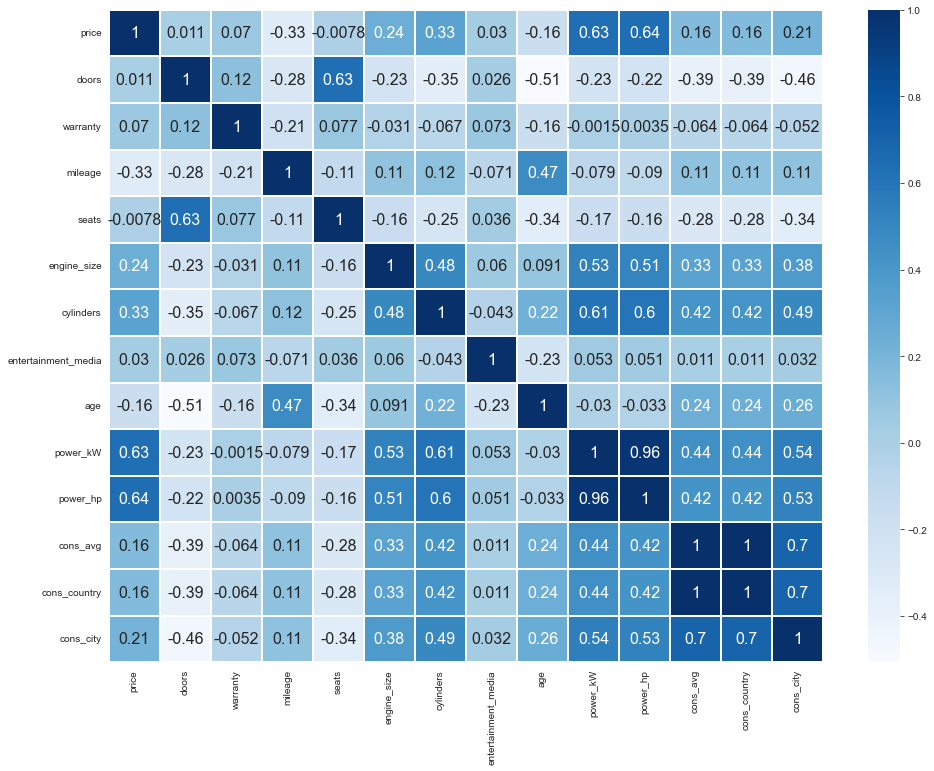

In [ ]:
plt.figure(figsize=(16, 12))

sns.heatmap(numeric_col.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

In [ ]:
df.duplicated(keep=False).sum()

3339

In [ ]:
print(df.shape)
df.drop(["safety_security", "entertainment_media"], axis=1, inplace=True)
print(df.shape)

In [ ]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(22655, 18)
(20773, 18)


In [ ]:
df.drop(["location"], axis=1, inplace=True)
print(df.shape)

In [ ]:
df.drop(["paint"], axis=1, inplace=True)
print(df.shape)

In [ ]:
df.drop(["comfort_convenience"], axis=1, inplace=True)
print(df.shape)

(22655, 20)


In [ ]:
df.drop(["seller"], axis=1, inplace=True)
print(df.shape)

(22655, 19)


In [ ]:
df.drop(["type"], axis=1, inplace=True)
print(df.shape)

In [ ]:
Modelx0, labels0 = pd.factorize(df["body_type"])
df["body_type"] = Modelx0

In [ ]:
Modelx0, labels0 = pd.factorize(df["gearbox"])
df["gearbox"] = Modelx0

In [ ]:
Modelx0, labels0 = pd.factorize(df["fuel_type"])
df["fuel_type"] = Modelx0

In [ ]:
Modelx0, labels0 = pd.factorize(df["full_service_history"])
df["full_service_history"] = Modelx0

In [ ]:
Modelx0, labels0 = pd.factorize(df["make_model"])
df["make_model"] = Modelx0

In [ ]:

df.to_csv("final_dummy2022.csv", index=False)
pd.read_csv("final_dummy2022.csv")

make_model           make     price  body_type  warranty    mileage  \
0               0  Mercedes-Benz 69900.000          0    12.000  18900.000   
1               1  Mercedes-Benz 46990.000          0    12.000  18995.000   
2               0  Mercedes-Benz 16800.000          0    12.000 197000.000   
3               2  Mercedes-Benz  4690.000          0    12.000 165000.000   
4               3  Mercedes-Benz 26900.000          0    24.000  48900.000   
...           ...            ...       ...        ...       ...        ...   
20768         390          Volvo  4999.000          5    12.000 166512.000   
20769         391          Volvo  5499.000          5    12.000 145000.000   
20770         393          Volvo  7300.000          5    13.000  96000.000   
20771         398          Volvo 29900.000          5    12.000  94343.000   
20772         389          Volvo  4440.000          5    12.000 230047.000   

       gearbox  fuel_type  seats  engine_size  cylinders  \
0            0          0  5.000         1991      4.000   
1            0          0  5.000         1991      4.000   
2            0          1  5.000         2143      4.000   
3            1          0  4.000         1799      4.000   
4            0          0  5.000         1991      4.000   
...        ...        ...    ...          ...        ...   
20768        1          0  5.000         2521      5.000   
20769        0          0  5.000         2435      5.000   
20770        1          1  4.000         1560      4.000   
20771        0          0  5.000         1969      4.000   
20772        0          0  5.000         2922      6.000   

       full_service_history    age  power_kW  power_hp  cons_avg  \
0                         0  2.000   310.000   421.000     8.400   
1                         0  2.000   225.000   306.000     7.300   
2                         0  7.000   100.000   136.000     4.900   
3                         1 17.000    90.000   122.000     8.200   
4                         0  3.000   140.000   190.000     6.100   
...                     ...    ...       ...       ...       ...   
20768                     0 18.000   154.000   209.000     9.100   
20769                     1 18.000   125.000   170.000     9.100   
20770                     1 11.000    84.000   114.000     3.800   
20771                     1  5.000   187.000   254.000     6.500   
20772                     0 20.000   147.000   200.000    10.400   

       cons_country  cons_city  
0             8.400     10.900  
1             7.300      9.300  
2             4.900      5.700  
3             8.200     11.600  
4             6.100      8.100  
...             ...        ...  
20768         9.100     12.900  
20769         9.100     13.200  
20770         3.800      4.300  
20771         6.500      8.600  
20772        10.400     15.300  

[20773 rows x 18 columns]

In [ ]:
df

make_model           make     price  body_type  warranty    mileage  \
2               0  Mercedes-Benz 69900.000          0    12.000  18900.000   
3               1  Mercedes-Benz 46990.000          0    12.000  18995.000   
4               0  Mercedes-Benz 16800.000          0    12.000 197000.000   
5               2  Mercedes-Benz  4690.000          0    12.000 165000.000   
7               3  Mercedes-Benz 26900.000          0    24.000  48900.000   
...           ...            ...       ...        ...       ...        ...   
28624         390          Volvo  4999.000          5    12.000 166512.000   
28626         391          Volvo  5499.000          5    12.000 145000.000   
28627         393          Volvo  7300.000          5    13.000  96000.000   
28628         398          Volvo 29900.000          5    12.000  94343.000   
28629         389          Volvo  4440.000          5    12.000 230047.000   

       gearbox  fuel_type  seats  engine_size  cylinders  \
2            0          0  5.000         1991      4.000   
3            0          0  5.000         1991      4.000   
4            0          1  5.000         2143      4.000   
5            1          0  4.000         1799      4.000   
7            0          0  5.000         1991      4.000   
...        ...        ...    ...          ...        ...   
28624        1          0  5.000         2521      5.000   
28626        0          0  5.000         2435      5.000   
28627        1          1  4.000         1560      4.000   
28628        0          0  5.000         1969      4.000   
28629        0          0  5.000         2922      6.000   

       full_service_history    age  power_kW  power_hp  cons_avg  \
2                         0  2.000   310.000   421.000     8.400   
3                         0  2.000   225.000   306.000     7.300   
4                         0  7.000   100.000   136.000     4.900   
5                         1 17.000    90.000   122.000     8.200   
7                         0  3.000   140.000   190.000     6.100   
...                     ...    ...       ...       ...       ...   
28624                     0 18.000   154.000   209.000     9.100   
28626                     1 18.000   125.000   170.000     9.100   
28627                     1 11.000    84.000   114.000     3.800   
28628                     1  5.000   187.000   254.000     6.500   
28629                     0 20.000   147.000   200.000    10.400   

       cons_country  cons_city  
2             8.400     10.900  
3             7.300      9.300  
4             4.900      5.700  
5             8.200     11.600  
7             6.100      8.100  
...             ...        ...  
28624         9.100     12.900  
28626         9.100     13.200  
28627         3.800      4.300  
28628         6.500      8.600  
28629        10.400     15.300  

[20773 rows x 18 columns]

In [ ]:
df.T

2                       3      \
make_model            Mercedes-Benz A 45 AMG  Mercedes-Benz A 35 AMG   
make                           Mercedes-Benz           Mercedes-Benz   
price                              69900.000               46990.000   
body_type                            Compact                 Compact   
warranty                              12.000                  12.000   
mileage                            18900.000               18995.000   
gearbox                            Automatic               Automatic   
fuel_type                            Benzine                 Benzine   
seats                                  5.000                   5.000   
engine_size                             1991                    1991   
cylinders                              4.000                   4.000   
full_service_history                      No                      No   
age                                    2.000                   2.000   
power_kW                             310.000                 225.000   
power_hp                             421.000                 306.000   
cons_avg                               8.400                   7.300   
cons_country                           8.400                   7.300   
cons_city                             10.900                   9.300   

                                       4                    5      \
make_model            Mercedes-Benz A 45 AMG  Mercedes-Benz C 160   
make                           Mercedes-Benz        Mercedes-Benz   
price                              16800.000             4690.000   
body_type                            Compact              Compact   
warranty                              12.000               12.000   
mileage                           197000.000           165000.000   
gearbox                            Automatic               Manual   
fuel_type                             Diesel              Benzine   
seats                                  5.000                4.000   
engine_size                             2143                 1799   
cylinders                              4.000                4.000   
full_service_history                      No                  Yes   
age                                    7.000               17.000   
power_kW                             100.000               90.000   
power_hp                             136.000              122.000   
cons_avg                               4.900                8.200   
cons_country                           4.900                8.200   
cons_city                              5.700               11.600   

                                    7                       8      \
make_model            Mercedes-Benz A 220  Mercedes-Benz A 35 AMG   
make                        Mercedes-Benz           Mercedes-Benz   
price                           26900.000               44999.000   
body_type                         Compact                 Compact   
warranty                           24.000                  24.000   
mileage                         48900.000               56876.000   
gearbox                         Automatic               Automatic   
fuel_type                         Benzine                 Benzine   
seats                               5.000                   5.000   
engine_size                          1991                    1991   
cylinders                           4.000                   4.000   
full_service_history                   No                      No   
age                                 3.000                   3.000   
power_kW                          140.000                 225.000   
power_hp                          190.000                 306.000   
cons_avg                            6.100                   0.000   
cons_country                        6.100                   0.000   
cons_city                           8.100                   9.300   

                                    9         

In [ ]:
cleaned_and_Handling_data2.csv

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20773 entries, 2 to 28629
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            20773 non-null  int64  
 1   make                  20773 non-null  object 
 2   price                 20773 non-null  float64
 3   body_type             20773 non-null  int64  
 4   warranty              20773 non-null  float64
 5   mileage               20773 non-null  float64
 6   gearbox               20773 non-null  int64  
 7   fuel_type             20773 non-null  int64  
 8   seats                 20773 non-null  float64
 9   engine_size           20773 non-null  int64  
 10  cylinders             20773 non-null  float64
 11  full_service_history  20773 non-null  int64  
 12  age                   20773 non-null  float64
 13  power_kW              20472 non-null  float64
 14  power_hp              20773 non-null  float64
 15  cons_avg           

(24583, 24)


In [ ]:
categoric_col = df.select_dtypes(include="object")
display(categoric_col.columns)

Index(['type', 'gearbox', 'fuel_type', 'paint', 'seller',
       'comfort_convenience', 'full_service_history'],
      dtype='object')

(24583, 544)

In [ ]:
for column in ['make']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies
    df.drop(column, axis=1, inplace=True)

df.T

2         3          4          5         7      \
make_model               0.000     1.000      0.000      2.000     3.000   
price                69900.000 46990.000  16800.000   4690.000 26900.000   
body_type                0.000     0.000      0.000      0.000     0.000   
warranty                12.000    12.000     12.000     12.000    24.000   
mileage              18900.000 18995.000 197000.000 165000.000 48900.000   
gearbox                  0.000     0.000      0.000      1.000     0.000   
fuel_type                0.000     0.000      1.000      0.000     0.000   
seats                    5.000     5.000      5.000      4.000     5.000   
engine_size           1991.000  1991.000   2143.000   1799.000  1991.000   
cylinders                4.000     4.000      4.000      4.000     4.000   
full_service_history     0.000     0.000      0.000      1.000     0.000   
age                      2.000     2.000      7.000     17.000     3.000   
power_kW               310.000   225.000    100.000     90.000   140.000   
power_hp               421.000   306.000    136.000    122.000   190.000   
cons_avg                 8.400     7.300      4.900      8.200     6.100   
cons_country             8.400     7.300      4.900      8.200     6.100   
cons_city               10.900     9.300      5.700     11.600     8.100   
Dacia                    0.000     0.000      0.000      0.000     0.000   
Fiat                     0.000     0.000      0.000      0.000     0.000   
Ford                     0.000     0.000      0.000      0.000     0.000   
Hyundai                  0.000     0.000      0.000      0.000     0.000   
Mercedes-Benz            1.000     1.000      1.000      1.000     1.000   
Nissan                   0.000     0.000      0.000      0.000     0.000   
Opel                     0.000     0.000      0.000      0.000     0.000   
Peugeot                  0.000     0.000      0.000      0.000     0.000   
Renault                  0.000     0.000      0.000      0.000     0.000   
SEAT                     0.000     0.000      0.000      0.000     0.000   
Skoda                    0.000     0.000      0.000      0.000     0.000   
Toyota                   0.000     0.000      0.000      0.000     0.000   
Volvo                    0.000     0.000      0.000      0.000     0.000   

                         8         9         10        11        12     \
make_model               1.000     4.000     5.000     0.000     6.000   
price                44999.000 23900.000 14200.000 37999.000 23999.000   
body_type                0.000     0.000     0.000     0.000     0.000   
warranty                24.000    12.000    12.000    12.000    12.000   
mileage              56876.000 21854.000 99016.000 90000.000 25914.000   
gearbox                  0.000     0.000     1.000     0.000     0.000   
fuel_type                0.000     1.000     1.000     0.000     0.000   
seats                    5.000     5.000     5.000     5.000     5.000   
engine_size           1991.000  1991.000  1461.000  1991.000  1991.000   
cylinders                4.000     4.000     4.000     4.000     4.000   
full_service_history     0.000     0.000     0.000     0.000     0.000   
age                      3.000     4.000     7.000     6.000     9.000   
power_kW               225.000       NaN    66.000   280.000   155.000   
power_hp               306.000   139.000    90.000   381.000   211.000   
cons_avg                 0.000     5.400     3.800     6.900     6.000   
cons_country             0.000     5.400     3.800     6.900     6.000   
cons_city                9.300     6.900     4.500     9.200     7.900   
Dacia                    0.000     0.000     0.000     0.000     0.000   
Fiat                     0.000     0.000     0.000     0.000     0.000   
Ford                     0.000     0.000     0.000     0.000     0.000   
Hyundai                  0.000     0.000     0.000     0.000     0.000   
Mercedes-Benz            1.000     1.000

In [ ]:
df

make_model     price  body_type  warranty    mileage  gearbox  \
2               0 69900.000          0    12.000  18900.000        0   
3               1 46990.000          0    12.000  18995.000        0   
4               0 16800.000          0    12.000 197000.000        0   
5               2  4690.000          0    12.000 165000.000        1   
7               3 26900.000          0    24.000  48900.000        0   
...           ...       ...        ...       ...        ...      ...   
28624         390  4999.000          5    12.000 166512.000        1   
28626         391  5499.000          5    12.000 145000.000        0   
28627         393  7300.000          5    13.000  96000.000        1   
28628         398 29900.000          5    12.000  94343.000        0   
28629         389  4440.000          5    12.000 230047.000        0   

       fuel_type  seats  engine_size  cylinders  full_service_history    age  \
2              0  5.000         1991      4.000                     0  2.000   
3              0  5.000         1991      4.000                     0  2.000   
4              1  5.000         2143      4.000                     0  7.000   
5              0  4.000         1799      4.000                     1 17.000   
7              0  5.000         1991      4.000                     0  3.000   
...          ...    ...          ...        ...                   ...    ...   
28624          0  5.000         2521      5.000                     0 18.000   
28626          0  5.000         2435      5.000                     1 18.000   
28627          1  4.000         1560      4.000                     1 11.000   
28628          0  5.000         1969      4.000                     1  5.000   
28629          0  5.000         2922      6.000                     0 20.000   

       power_kW  power_hp  cons_avg  cons_country  cons_city  Dacia  Fiat  \
2       310.000   421.000     8.400         8.400     10.900      0     0   
3       225.000   306.000     7.300         7.300      9.300      0     0   
4       100.000   136.000     4.900         4.900      5.700      0     0   
5        90.000   122.000     8.200         8.200     11.600      0     0   
7       140.000   190.000     6.100         6.100      8.100      0     0   
...         ...       ...       ...           ...        ...    ...   ...   
28624   154.000   209.000     9.100         9.100     12.900      0     0   
28626   125.000   170.000     9.100         9.100     13.200      0     0   
28627    84.000   114.000     3.800         3.800      4.300      0     0   
28628   187.000   254.000     6.500         6.500      8.600      0     0   
28629   147.000   200.000    10.400        10.400     15.300      0     0   

       Ford  Hyundai  Mercedes-Benz  Nissan  Opel  Peugeot  Renault  SEAT  \
2         0        0              1       0     0        0        0     0   
3         0        0              1       0     0        0        0     0   
4         0        0              1       0     0        0        0     0   
5         0        0              1       0     0        0        0     0   
7         0        0              1       0     0        0        0     0   
...     ...      ...            ...     ...   ...      ...      ...   ...   
28624     0        0              0       0     0        0        0     0   
28626     0        0              0       0     0        0        0     0   
28627     0        0              0       0     0        0        0     0   
28628     0        0              0       0     0        0        0     0   
28629     0        0              0       0     0        0        0     0   

       Skoda  Toyota  Volvo  
2          0       0      0  
3          0       0      0  
4          0       0      0  
5          0       0      0  
7          0       0      0  
...      ...     ...    ...  
28624      0       0      1  
28626      0       0      1  
28627      0       0      1  
28628      0       0      1  
2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20773 entries, 2 to 28629
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            20773 non-null  int64  
 1   price                 20773 non-null  float64
 2   body_type             20773 non-null  int64  
 3   warranty              20773 non-null  float64
 4   mileage               20773 non-null  float64
 5   gearbox               20773 non-null  int64  
 6   fuel_type             20773 non-null  int64  
 7   seats                 20773 non-null  float64
 8   engine_size           20773 non-null  int64  
 9   cylinders             20773 non-null  float64
 10  full_service_history  20773 non-null  int64  
 11  age                   20773 non-null  float64
 12  power_kW              20472 non-null  float64
 13  power_hp              20773 non-null  float64
 14  cons_avg              20761 non-null  float64
 15  cons_country       

In [ ]:
df = df.astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20773 entries, 2 to 28629
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            20773 non-null  float64
 1   price                 20773 non-null  float64
 2   body_type             20773 non-null  float64
 3   warranty              20773 non-null  float64
 4   mileage               20773 non-null  float64
 5   gearbox               20773 non-null  float64
 6   fuel_type             20773 non-null  float64
 7   seats                 20773 non-null  float64
 8   engine_size           20773 non-null  float64
 9   cylinders             20773 non-null  float64
 10  full_service_history  20773 non-null  float64
 11  age                   20773 non-null  float64
 12  power_kW              20472 non-null  float64
 13  power_hp              20773 non-null  float64
 14  cons_avg              20761 non-null  float64
 15  cons_country       

In [ ]:
df.to_csv("final_full.csv", index=False)

In [ ]:
df_final = pd.read_csv("final_full.csv")
df_final.head().T

0         1          2          3         4
make_model               0.000     1.000      0.000      2.000     3.000
price                69900.000 46990.000  16800.000   4690.000 26900.000
body_type                0.000     0.000      0.000      0.000     0.000
warranty                12.000    12.000     12.000     12.000    24.000
mileage              18900.000 18995.000 197000.000 165000.000 48900.000
gearbox                  0.000     0.000      0.000      1.000     0.000
fuel_type                0.000     0.000      1.000      0.000     0.000
seats                    5.000     5.000      5.000      4.000     5.000
engine_size           1991.000  1991.000   2143.000   1799.000  1991.000
cylinders                4.000     4.000      4.000      4.000     4.000
full_service_history     0.000     0.000      0.000      1.000     0.000
age                      2.000     2.000      7.000     17.000     3.000
power_kW               310.000   225.000    100.000     90.000   140.000
power_hp               421.000   306.000    136.000    122.000   190.000
cons_avg                 8.400     7.300      4.900      8.200     6.100
cons_country             8.400     7.300      4.900      8.200     6.100
cons_city               10.900     9.300      5.700     11.600     8.100
Dacia                    0.000     0.000      0.000      0.000     0.000
Fiat                     0.000     0.000      0.000      0.000     0.000
Ford                     0.000     0.000      0.000      0.000     0.000
Hyundai                  0.000     0.000      0.000      0.000     0.000
Mercedes-Benz            1.000     1.000      1.000      1.000     1.000
Nissan                   0.000     0.000      0.000      0.000     0.000
Opel                     0.000     0.000      0.000      0.000     0.000
Peugeot                  0.000     0.000      0.000      0.000     0.000
Renault                  0.000     0.000      0.000      0.000     0.000
SEAT                     0.000     0.000      0.000      0.000     0.000
Skoda                    0.000     0.000      0.000      0.000     0.000
Toyota                   0.000     0.000      0.000      0.000     0.000
Volvo                    0.000     0.000      0.000      0.000     0.000